# Exploratory Data Analysis

In [1]:
import os                       # For working in different directories
import yaml                     # working w/ config file
import numpy as np              # Data Libraries
import pandas as pd             # Data Libraries
import matplotlib.pyplot as plt # Visualization Library
import seaborn as sns           # Visualization Library
import folium                   # Visualization Library
from folium.features import DivIcon  # Visualization Library
import geopandas as gpd         # geospatial library 
from shapely.geometry import Point  # geospatial library 

# Load Brewery GeoDataFrame
* see project file `DenverCraftBreweries_breweries.ipynb` for GeoDataFrame origin
* first 9 columns are from coloradobrewerylist.com whereas the remaining columns are the result of a merge w/ the Census Bureau Places GeoDataFrame
    - the brewery info (location: lat/lon) on the left fits within the Census Bureau Place geospatial boundary on the right

In [2]:
os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/data/Breweries/coloradobrewerylist')
gdf_breweries = pd.read_pickle('gdf_msa_coloradobrewerylist.pkl')
print(gdf_breweries.shape)
gdf_breweries.head()

(181, 17)


,brewery,phone,website,addr,city,zipcode,lat,lon,geometry,GEO_ID,NAMELSAD,ALAND,AWATER,num_major_roads,num_colleges,num_medical_facilities,num_airports
1,12Degree Brewing,720-638-1623,http://www.12degree.com,"820 Main St, Louisville, CO 80027, USA",Louisville,80027,39.978254,-105.131880,POINT (-105.13188 39.97825),1600000US0846355,Louisville city,20643693,288084,7,0,1,0
118,Crystal Springs Brewing Company Taproom,720-572-7975,http://www.crystalspringsbrewing.com,"604 Main St, Louisville, CO 80027, USA",Louisville,80027,39.976030,-105.131831,POINT (-105.13183 39.97603),1600000US0846355,Louisville city,20643693,288084,7,0,1,0
172,Gravity Brewing,303-544-0746,http://thegravitybrewing.com/,"1150 Pine St b, Louisville, CO 80027, USA",Louisville,80027,39.976069,-105.128315,POINT (-105.12831 39.97607),1600000US0846355,Louisville city,20643693,288084,7,0,1,0
258,Mother Tucker Brewery (Louisville),,http://mothertuckerbrewery.com,"1134 W Dillon Rd #4, Louisville, CO 80027, USA",Louisville,80027,39.961916,-105.167051,POINT (-105.16705 39.96192),1600000US0846355,Louisville city,20643693,288084,7,0,1,0
2,14er Brewing & Beer Garden,720-773-1437,https://www.14erbrewing.com/,"3120 Blake St Ste C, Denver, CO 80205, USA",Denver,80205,39.764880,-104.980193,POINT (-104.98019 39.76488),1600000US0820000,Denver city,396460127,4275563,57,3,8,1


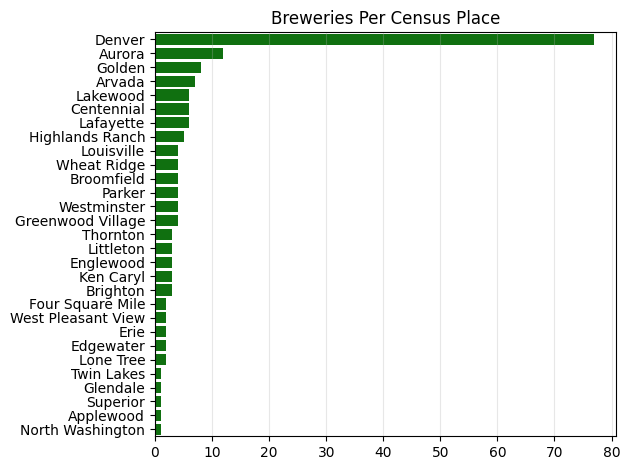

In [3]:
def hbarplot_brewery_density(gdf_breweries, color):
    """Function to create a horizontal bar graph for brewery density: number of breweries per
    Census geospatial Place.
    Aids in finding brewery hotspots throughout MSA area.
    params:
    gdf_breweries{GeoPandas GeoDataFrame} - 
    color{str} - color used for bars in barplot
    returns:
    matplotlib horizontal barplot of breweries
    """
    brew_count = gdf_breweries['NAMELSAD'].value_counts()

    plt.title('Breweries Per Census Place');
    ax = sns.barplot(
        y=[" ".join(i.split(' ')[:-1]) for i in brew_count.index.values], 
        x=brew_count.values, 
        color=color,
        orient='horizontal'
    );
#     ax.bar_label(ax.containers[0], fmt='%.0f')
    plt.grid(alpha=0.3, axis='x')
    
    plt.tight_layout()
    os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/finalized_figures')
    plt.savefig('breweries_per_place.png')

    plt.show()
    

hbarplot_brewery_density(gdf_breweries, 'green')

# Load Census Bureau Place Demographics GeoDataFrame
* see project file `DenverCraftBreweries_demographics.ipynb` for GeoDataFrame origin
* Create derived variable representing the count of breweries per Census Place & join to demographics GeoDataFrame
* NOTE: GeoDataFrame `gdf_place_demographics` will include the number of breweries per place as it is a geospatial merge of `gdf_msa_places` and `gdf_msa_breweries_groupy` as found in `DenverCraftBreweries_breweries.ipynb`

In [4]:
os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/\
data/US Census Bureau/American Community Survey')

gdf_demographics = pd.read_pickle('gdf_place_demographics.pkl') 

# Create Brewery Density column
gdf_demographics['brewery_density'] = gdf_demographics['num_breweries'] / gdf_demographics['ALAND']

gdf_demographics.head()

,GEO_ID,NAMELSAD,ALAND,AWATER,geometry,num_major_roads,num_colleges,num_medical_facilities,num_airports,num_breweries,...,tot_pop_hisp,tot_pop_hisp_%,avg_pop_density_>=21,target_occs,target_occs_%,target_age,target_age_%,target_hhinc,target_hhinc_%,brewery_density
0,1600000US0824950,Erie town,20.549384,0.100622,"POLYGON ((-105.10469 40.01455, -105.10380 40.0...",11,0,0,1,2,...,2717,9.3,959.396137,8952,59.3,9447,32.2,7810,79.1,0.097327
1,1600000US0850026,Meridian Village CDP,0.509432,0.000000,"POLYGON ((-104.83001 39.52793, -104.82992 39.5...",0,0,0,0,0,...,90,3.3,3623.640201,808,51.4,1087,39.6,834,85.1,0.000000
2,1600000US0869480,Shaw Heights CDP,0.700486,0.000776,"POLYGON ((-105.05042 39.86008, -105.04054 39.8...",1,0,0,0,0,...,2561,45.3,5426.230653,1713,56.5,2183,38.6,890,52.9,0.000000
3,1600000US0852350,Mountain View town,0.092980,0.000000,"POLYGON ((-105.06019 39.77661, -105.05325 39.7...",2,0,0,0,0,...,178,27.5,5345.237404,208,51.1,324,50.0,179,65.2,0.000000
4,1600000US0812815,Centennial city,29.743738,0.146450,"MULTIPOLYGON (((-104.97913 39.56942, -104.9769...",9,0,1,0,6,...,9693,9.0,2677.639257,30623,53.3,33042,30.6,28194,69.9,0.201723


## Explore Demographics
* We will rely on craft beer trade associations `Brewers Association` (1), and `Beverage Marketing Corporation` (2) trade group, `Harris Polls` (3) for craft beer drinker demographic insights, and (4) alcohol.org for higher alcohol consumption rates for particular occupations.
* Determining which Census Places have demographics more closely matching the craft beer drinker profile can help a brewery stay profitable and succeed in the long run.  Historically, 75% of craft beer drinkers will travel up to 10-miles from where they live for a craft beer (1) and so brewery geospatial placement is critical.
### Craft Beer Drinker Demographics:
* **ANNUAL HOUSEHOLD INCOME**: $\ge$ $\$$40K per year
    
    - (2) suggests $\$$40K+ household income accounts for 70.57% of all US beer drinkers and 41.77% of all beer drinkers have a household income in the range $\$$75K+.
    - (1) suggests that the highest craft beer consumption rates occur:
        - $\$$40K - $\$$75K: 48% of persons of legal drinking age will have a craft beer on a weekly basis, or 85% on a monthly basis.
        - **$\$$75K - $\$$99K** - 51% of this income bracket drinks craft beer on a weekly basis, or 87% on a monthly basis
        - $\$$100K+: 47% of persons of legal drinking age will have a craft beer on a weekly basis, or 85% on a monthly basis.
* **AGE**: $\ge$ 21 years old
    - 43% of legal drinking age persons drink craft beer per (1)
    - more than half of **21-44 year olds** drink craft beer per (1); 
            - this age band has the highest level of consumption, however, if more than 2 out of 5 adults in **every legal age bracket** drink we should not limit our results to just 21-44 y.o.
        - 85% of beer drinkers are 21 - 64 years old per (2)
        - 48.42% of all beer drinkers are 21-44 y.o. per whereas 51.6% of all beer drinkers are older than 44 y.o. (2)
* **ETHNICITY**: white
    - 2018 Harris Poll (3) indicated craft beer drinkers are **85.5%** white, and in 2015 it was 86.3% white per info summarized & presented by (1)
    - per (1) some evidence **Hispanic population** has increased craft engagement, although figures not immediately presented
* **GENDER**: 68.9% male, 31.1% female
    - 31.5% female, 68.5% male annual craft beer drinkers in 2018 per (1)
    - 31.1% female, 68.9% male weekly craft beer drinkers in 2018 per (1)
    - 29.1% female, 70.9% male ‘several times a year’ craft beer drinkers in 2018 per (1)
    - 61.6% male, 38.4% female for beer drinkers collectively per (2)
    - NOTE: it's anticipated that gender ratios will be approximately 50-50 and therefore a higher drinking age population overall in any given area will likely be more indicative of craft brewery success than gender
* **OCCUPATIONS**:
    - the following occupations are known to have a higher alcohol consumption rate per (4):
        - lawyers 20.0%
        - mining 17.5%
        - construction 16.5%
        - nurses_and_healthcare_prof 15.3%
        - hospitality_and_food_services 11.8%
        - arts_and_entertainment 11.5%
        - management 9.0%
        - finance_and_insurance 7.4%
        - real_estate 5.0%
        - educational_services 4.7%
    - Census Bureau demographics do not directly translate from the above occupations/occupational categories, however, closely follow in most cases with several categorical consolidations:
        - Agriculture, forestry, fishing and hunting, and mining
        - Construction
        - Professional, scientific, and management, and administrative and waste management services
        - Educational services, and health care and social assistance
        - Arts, entertainment, and recreation, and accommodation and food services
* **EDUCATION**: $\ge$ bachelor's degree
    - While a presentation by (1) suggests the average craft beer drinker is highly educated (assumed to mean $\ge$ bachelor's degree), no precise definition is provided.  However, there is a known general assocation between education and income-level.

## A Note on Covariance & Multicollinearity
* We anticipate a fair amount of covariance given the demographic profile of a craft beer drinker, for example age and income, or education level and household income are likely correlated.
* Clustering models such as agglomerative hierarchical or DBSCAN are less adverse to correlation within a data structure as compared to other ML methods
* If variables are highly correlated, a given algorithm may give more weight to certain dimensions, potentially affecting the clustering results.
* Highly correlated variables may provide redundant information, potentially leading to clusters that are heavily influenced by a subset of variables.
* PCA can be performed to gain an understanding of which features have more explained variance and to reduce dimensions significantly, however, these features may still ultimately be correlated to some extent.

# Variable Exploration

In [5]:
os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/finalized_figures')

def explore_variable(gdf, variable, chart_title, binwidth=None, kde=True, log=None, save=False):
    """Explores how data are distributed via histogram (w/ KDE if specified), 
    boxplot and statistical panel summary.
    params:
    gdf{GeoPandas GeoDataFrame} - dataframe in which desired column resides
    variable{str} - column in df
    chart_title{str} - title to be used for histogram and boxplot
    binwidth{int} - binwidth param is used to adjust histogram bar groupings; overall perspective is important
    kde{bool} - if True adds a Kernel Density Estimate (KDE) to our histogram plot
    log{True, none} - will take the logarithm of y-axis; frequently done to better examine data
    returns:
    matplotlib figures - histogram w/ KDE if chosen, barplot and statistical summary of variable passed
    """
    # histogram to determine overall distribution
    # w/ Kernel Density Estimate (KDE)
    if kde is True:
        sns.histplot(data=gdf, x=variable, binwidth=binwidth, kde=True, log_scale=log);
        plt.title(f'Histogram of {chart_title} with KDE')
    # w/out Kernel Density Estimate (KDE)
    elif kde is False:
        sns.histplot(data=gdf, x=variable, binwidth=binwidth, kde=False, log_scale=log);
        plt.title(f'Histogram of {chart_title}')
    
    # add data source origin footnote
    plt.figtext(
        0.5, -0.1, 
        "data: 2021 American Community Survey (ACS), US Census Bureau", 
        ha="center", 
        fontsize=8, 
        bbox={"facecolor": "white", "alpha": 1, "pad": 0.1}
    )
    plt.xticks(ha='right', rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    if save is True:
        plt.savefig(f"histogram_{chart_title}.png")
    
    plt.show()
    

    # boxplot
    fig = plt.figure(figsize=(2, 4))   # Adjust the figure size values as needed
    ax = fig.gca()                     # create an axis for plotting - get current axis (GCA)
    sns.boxplot(data=gdf, y=variable, ax=ax);
    plt.grid(alpha=0.3)
    plt.tight_layout()
    if save is True:
        plt.savefig(f"boxplot_{variable}.png")
    plt.show()

    # statistical panel summary
    display(pd.DataFrame(gdf[variable].describe()))

def create_barplot(variable, limit_start, limit_end, chart_title, xlabel, 
                   color, orientation, asc=False, numbers=False, save=False):  
    """Creates a vertical or horizontal barplot of variables found in gdf_demographics.
    params:
    variable{str} - column from dataframe gdf_demographics
    limit_start{int} - changes where the bars begin, by value, and therefore how many bars are displayed
    limit_end{int} - changes where the bars begin, by value, and therefore how many bars are displayed
    chart_title{str} - chart's title, overlaid at top
    xlabel{str} - x-axis label
    color{str} - color used for bars in barplot
    orientation{str: horizontal|verical} - changes the barplot orientation to either vertical or horizontal
    asc{bool} - ascending - if True sorts according by ascending values, otherwise sorts by descending values
    numbers{bool} - if True will add respective values to bars w/in barplot
    returns:
    Matplotlib plot
    """
    temp = gdf_demographics[['NAME', variable]].sort_values(
        by=variable, 
        ascending=asc
    )[limit_start:limit_end]

    ax = sns.barplot(
        y=[" ".join(i.split(' ')[:-2]) for i in temp['NAME']], 
        x=variable, 
        color=color,
        orient=orientation,
        data=temp
    );
    if numbers is True:
        ax.bar_label(ax.containers[0], fmt=lambda x:'{:,.0f}'.format(x))
    # plt.xticks(ha='right', rotation=45);

    plt.title(chart_title);
    plt.xlabel(xlabel)
    plt.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    if save is True:
        plt.savefig(f"barplot_{chart_title}.png")

    plt.show()

### Household Income

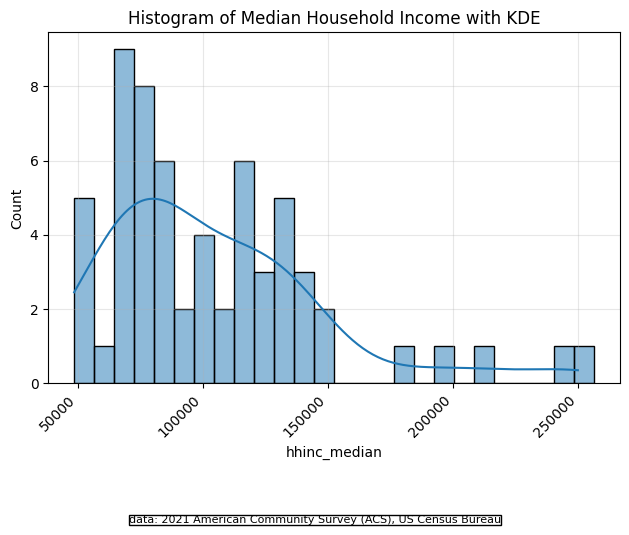

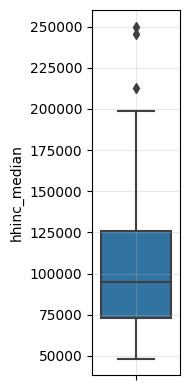

,hhinc_median
count,61.000000
mean,104854.090164
std,44039.704225
min,48449.000000
25%,73163.000000
50%,95033.000000
75%,125634.000000
max,250001.000000


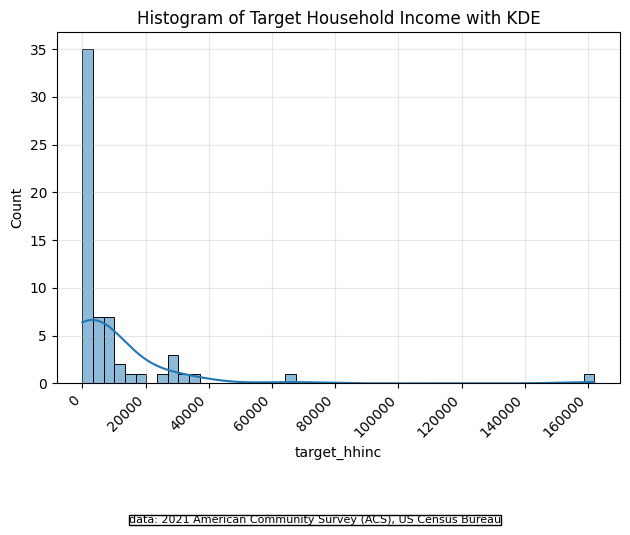

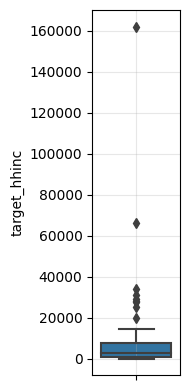

,target_hhinc
count,61.000000
mean,9602.163934
std,22988.971753
min,2.000000
25%,834.000000
50%,2577.000000
75%,7555.000000
max,162070.000000


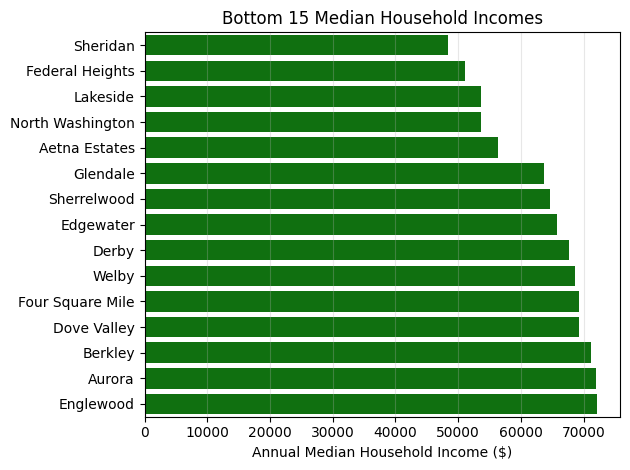

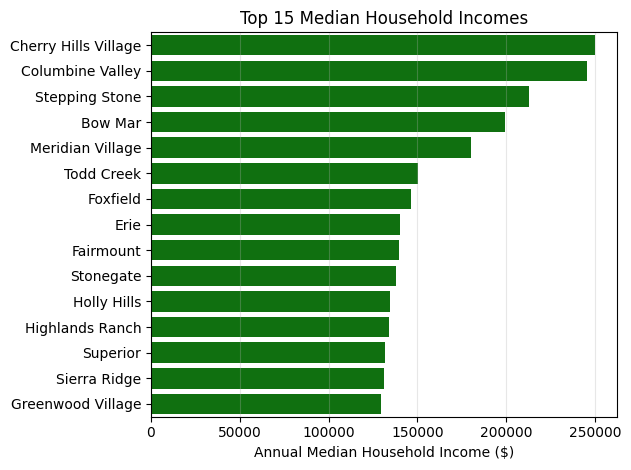

In [6]:
explore_variable(gdf_demographics, 'hhinc_median', 'Median Household Income', 
                 binwidth=8000, kde=True, save=True)
explore_variable(gdf_demographics, 'target_hhinc', 'Target Household Income', 
                 binwidth=None, kde=True, log=False, save=True)
create_barplot(
    variable='hhinc_median', 
    limit_start=0, limit_end=15,
    chart_title="Bottom 15 Median Household Incomes",
    xlabel="Annual Median Household Income ($)",
    color='green', 
    orientation='horizontal', 
    asc=True,
    numbers=False,
    save=True
)

create_barplot(
    variable='hhinc_median', 
    limit_start=0, limit_end=15,
    chart_title="Top 15 Median Household Incomes",
    xlabel="Annual Median Household Income ($)",
    color='green', 
    orientation='horizontal', 
    asc=False,
    numbers=False,
    save=True
)

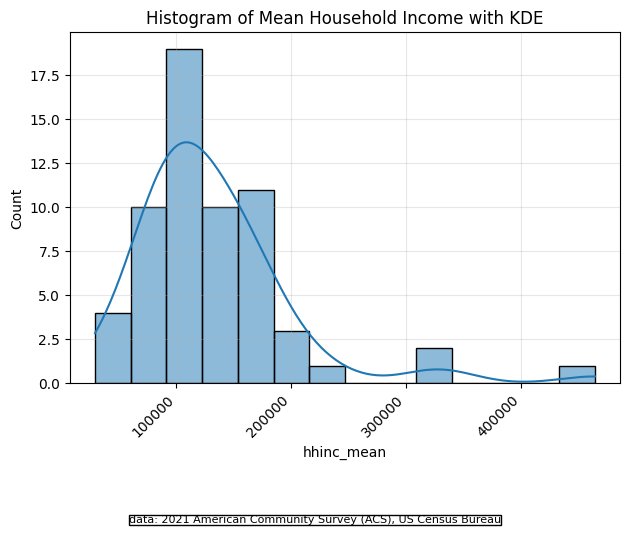

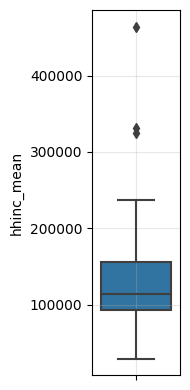

,hhinc_mean
count,61.000000
mean,132943.032787
std,70557.121669
min,29296.000000
25%,92579.000000
50%,113956.000000
75%,155739.000000
max,464068.000000


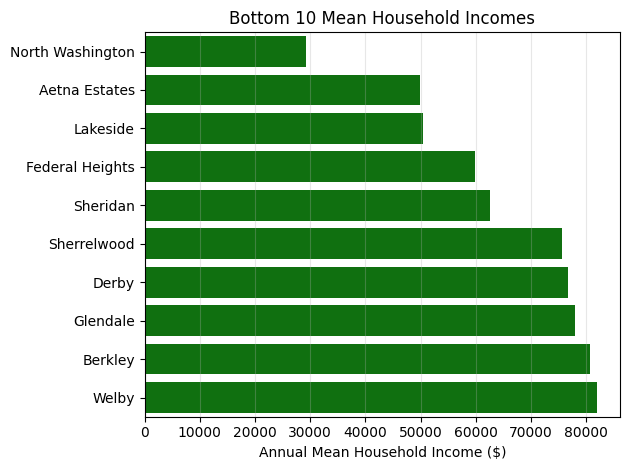

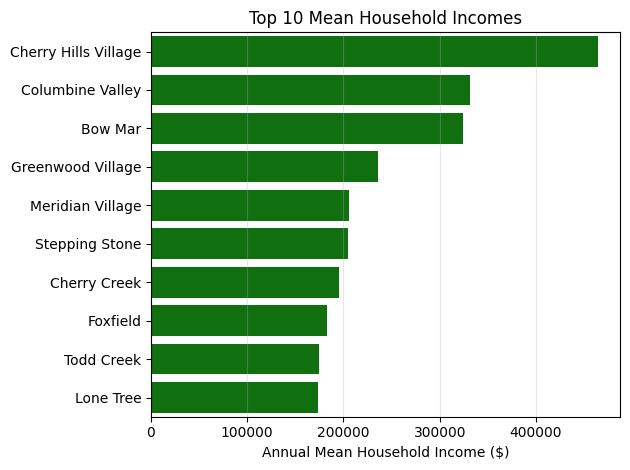

In [7]:
explore_variable(gdf_demographics, 'hhinc_mean', 'Mean Household Income', binwidth=None, kde=True, log=False)
# NOTE we can show mean hhinc, however, we will use median hhinc instead for the sake of brevity
create_barplot(
    variable='hhinc_mean', 
    limit_start=0, limit_end=10,
    chart_title="Bottom 10 Mean Household Incomes",
    xlabel="Annual Mean Household Income ($)",
    color='green', 
    orientation='horizontal', 
    asc=True,
    numbers=False
)

create_barplot(
    variable='hhinc_mean', 
    limit_start=0, limit_end=10,
    chart_title="Top 10 Mean Household Incomes",
    xlabel="Annual Mean Household Income ($)",
    color='green', 
    orientation='horizontal', 
    asc=False,
    numbers=False
)

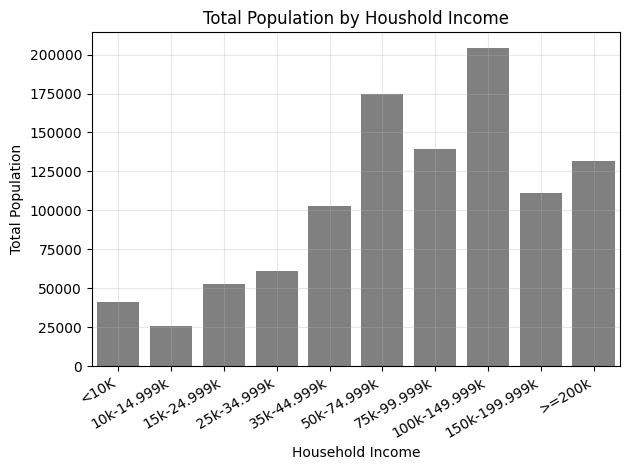

,hhinc_<10K,hhinc_10k-14.999k,hhinc_15k-24.999k,hhinc_25k-34.999k,hhinc_35k-44.999k,hhinc_50k-74.999k,hhinc_75k-99.999k,hhinc_100k-149.999k,hhinc_150k-199.999k,hhinc_>=200k
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,677.147541,418.278689,864.606557,1002.032787,1686.524590,2867.934426,2280.836066,3345.934426,1818.360656,2157.032787
std,2228.414607,1441.337505,2651.728557,2879.892122,4711.392185,7767.179619,5679.557947,7837.630660,4268.296378,5403.191467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,15.000000,38.000000,56.000000,102.000000,119.000000,106.000000,280.000000,114.000000,127.000000
50%,154.000000,69.000000,138.000000,220.000000,353.000000,645.000000,534.000000,856.000000,357.000000,586.000000
75%,470.000000,222.000000,649.000000,700.000000,1320.000000,2206.000000,2103.000000,2824.000000,1530.000000,1814.000000
max,16407.000000,10783.000000,19135.000000,20097.000000,32289.000000,53145.000000,38857.000000,53482.000000,30025.000000,39706.000000


In [8]:
ages = gdf_demographics[[
    'hhinc_<10K', 
    'hhinc_10k-14.999k',
    'hhinc_15k-24.999k',
    'hhinc_25k-34.999k',
    'hhinc_35k-44.999k',
    'hhinc_50k-74.999k',
    'hhinc_75k-99.999k',
    'hhinc_100k-149.999k',
    'hhinc_150k-199.999k',
    'hhinc_>=200k'
]].sum(axis=0);

sns.barplot(x=[ages.split("_")[-1] for ages in ages.index.to_list()], y=ages.values, color='gray');
plt.title("Total Population by Houshold Income")
plt.xlabel("Household Income")
plt.ylabel("Total Population")
plt.xticks(ha='right', rotation=30)
plt.tight_layout()
plt.grid(alpha=0.3);
os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/finalized_figures')
plt.savefig('Total Population by Household Income Band.png')
plt.show();

gdf_demographics[[
    'hhinc_<10K', 
    'hhinc_10k-14.999k',
    'hhinc_15k-24.999k',
    'hhinc_25k-34.999k',
    'hhinc_35k-44.999k',
    'hhinc_50k-74.999k',
    'hhinc_75k-99.999k',
    'hhinc_100k-149.999k',
    'hhinc_150k-199.999k',
    'hhinc_>=200k'
]].describe()

#### Observations:
* We examine both median and mean household income as the median is robust to outliers whereas mean is not and discover that mean household income is being pulled significantly higher than the median household income in a majority of cases.
    - we can calculate difference (greater than 10K or more) between mean vs median for places to determine the main direction of outliers
* We also find for Census Places with a small population (< 400) of numerous households make comparatively little which pulls the mean towards $\$$0 significantly
* Higher median household income places appear to occur largely either South or NW of Downtown Denver.
* We find at least 1 home with a minimum mean household income of $\$$29,296, while on the otherhand we find a mean maximum of $\$$464,068. 
* The minimum median household income for the approximate Denver-Lakewood-Aurora MSA is above a desirable $\$$40K threshold, whereas roughly the 1st-2nd quartiles capture the demographic with the highest percentage of craft beer drinkers as detailed above.  The 1st quartile captures 25% of the population or less and so 25% of the population makes $73.2K or less. This indicates the approximate MSA overall is a desirable area for craft brewing based off of median household income, whereas mean household income indicates a half dozen Census Places are not w/in craft beer drinker demographics for mean household income in addition to having a a smaller overall population.

#### Specific Locales
* We can examine mean household income to see if any particular Census Places have a large number of households meet a given threshold ($\$$40K, $\$$75K).
* As we see below there are generally smaller Census Places given the land area (square miles) with fewer total households contributing to a lower mean household income.
* As we see below in many Census Places there are some people who are significantly richer than the median household income ($\gt$$\$$75K houshold income median vs mean: 72.13% vs 91.8%); suggesting pockets of uber wealthy

In [9]:
print(f"{gdf_demographics[(gdf_demographics['hhinc_median'] >= 75000) & (gdf_demographics['hhinc_median'] <= 99000)].shape[0] / len(gdf_demographics):.2%} of median Census Place household incomes are ideal")
print(f"{gdf_demographics[gdf_demographics['hhinc_median'] >= 75000].shape[0]/ len(gdf_demographics):.2%} of median household incomes per Census Place are above $75K")

27.87% of median Census Place household incomes are ideal
72.13% of median household incomes per Census Place are above $75K


In [10]:
print(f"{gdf_demographics[(gdf_demographics['hhinc_mean'] >= 75000) & (gdf_demographics['hhinc_mean'] <= 99000)].shape[0] / len(gdf_demographics):.2%} of mean Census Place household incomes are ideal")
print(f"{gdf_demographics[gdf_demographics['hhinc_mean'] >= 75000].shape[0]/ len(gdf_demographics):.2%} of mean household incomes per Census Place are above $75K")

display(gdf_demographics[(gdf_demographics['hhinc_mean'] <= 40000)][['NAMELSAD', 'ALAND', 'tot_hh', 'hhinc_median',  'hhinc_mean']])
gdf_demographics[(gdf_demographics['hhinc_mean'] < 75000) & (gdf_demographics['hhinc_mean'])][['NAMELSAD', 'ALAND', 'tot_hh', 'hhinc_median', 'hhinc_mean']]

24.59% of mean Census Place household incomes are ideal
91.80% of mean household incomes per Census Place are above $75K


,NAMELSAD,ALAND,tot_hh,hhinc_median,hhinc_mean
40,North Washington CDP,5.195862,208,53710.0,29296.0


,NAMELSAD,ALAND,tot_hh,hhinc_median,hhinc_mean
17,Aetna Estates CDP,0.130746,395,56342.0,49941.0
40,North Washington CDP,5.195862,208,53710.0,29296.0
43,Sheridan city,2.225427,2534,48449.0,62521.0
55,Federal Heights city,1.778659,4969,51078.0,59926.0
58,Lakeside town,0.187632,8,53710.0,50475.0


### Age

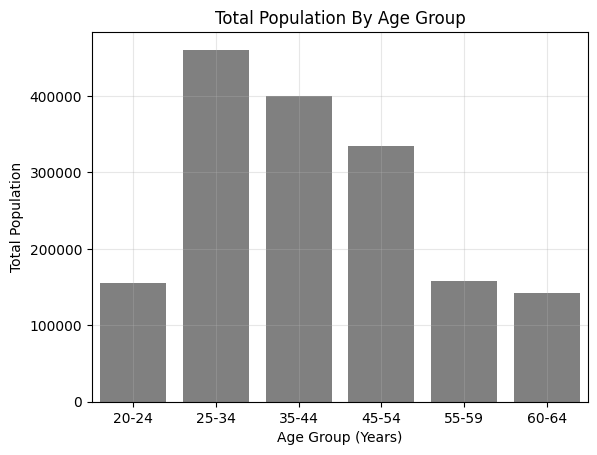

,tot_pop_20-24,tot_pop_25-34,tot_pop_35-44,tot_pop_45-54,tot_pop_55-59,tot_pop_60-64
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,2540.311475,7548.213115,6557.262295,5491.213115,2588.590164,2337.213115
std,6431.211694,22392.908597,16682.121476,12571.544464,5628.224552,5164.666043
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,157.000000,476.000000,530.000000,387.000000,148.000000,176.000000
50%,673.000000,1643.000000,1656.000000,1427.000000,587.000000,622.000000
75%,1957.000000,6108.000000,5191.000000,4359.000000,2300.000000,2126.000000
max,42411.000000,163445.000000,116263.000000,82611.000000,35813.000000,33289.000000


In [11]:
ages = gdf_demographics[[
    'tot_pop_20-24', 
    'tot_pop_25-34',
    'tot_pop_35-44',
    'tot_pop_45-54',
    'tot_pop_55-59',
    'tot_pop_60-64'
]].sum(axis=0);

sns.barplot(x=[ages.split("_")[-1] for ages in ages.index.to_list()], y=ages.values, color='gray');
plt.title("Total Population By Age Group")
plt.xlabel("Age Group (Years)")
plt.ylabel("Total Population")
plt.grid(alpha=0.3);
os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/finalized_figures')
plt.savefig('Total Population by Age Group.png')
plt.show();

gdf_demographics[[
    'tot_pop_20-24', 
    'tot_pop_25-34',
    'tot_pop_35-44',
    'tot_pop_45-54',
    'tot_pop_55-59',
    'tot_pop_60-64'
]].describe()

### Gender
* Gender is approximately even in aggregate across the approximate Denver-Lakewood-Aurora MSA and therefore provides little utility in our analysis
* We do find Census Places with smaller overall populations (< 400 people) and these appear to reflect a disparate percentage of the population in either case male vs female, however, the populations are small enough to warrant foregoing them in an analysis in part due to the proximity of neighboring large populations
* In larger Census Places we observe the gender ratio is approximately equal (Law of Large Numbers): 1:1

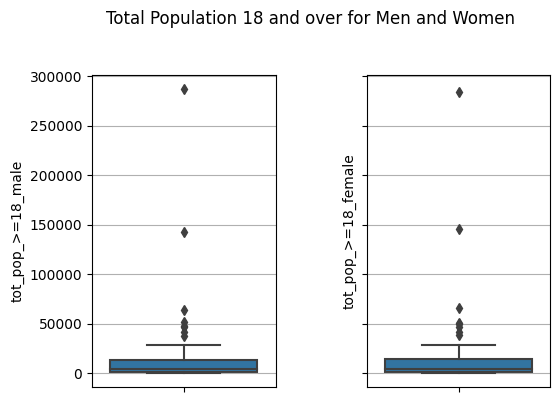

,tot_pop_>=18_male,tot_pop_>=18_female,tot_pop_>=18_male_%,tot_pop_>=18_female_%
count,61.000000,61.000000,61.000000,61.000000
mean,16706.114754,16779.131148,50.411475,49.588525
std,41560.728327,41497.733332,4.761376,4.761376
min,6.000000,2.000000,40.200000,25.000000
25%,1216.000000,1188.000000,48.900000,49.300000
50%,4002.000000,4231.000000,49.900000,50.100000
75%,13335.000000,14007.000000,50.700000,51.100000
max,286847.000000,283954.000000,75.000000,59.800000


In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.tight_layout(pad=5)
ax1.grid(axis='y')
ax2.grid(axis='y')

plt.suptitle("Total Population 18 and over for Men and Women")
sns.boxplot(data=gdf_demographics, y='tot_pop_>=18_male', ax=ax1);
sns.boxplot(data=gdf_demographics, y='tot_pop_>=18_female', ax=ax2);
plt.savefig('Total Population 18 and over: Men and Women.png')

plt.show()


gdf_demographics[[
    'tot_pop_>=18_male', 
    'tot_pop_>=18_female', 
    'tot_pop_>=18_male_%', 
    'tot_pop_>=18_female_%'
]].describe()

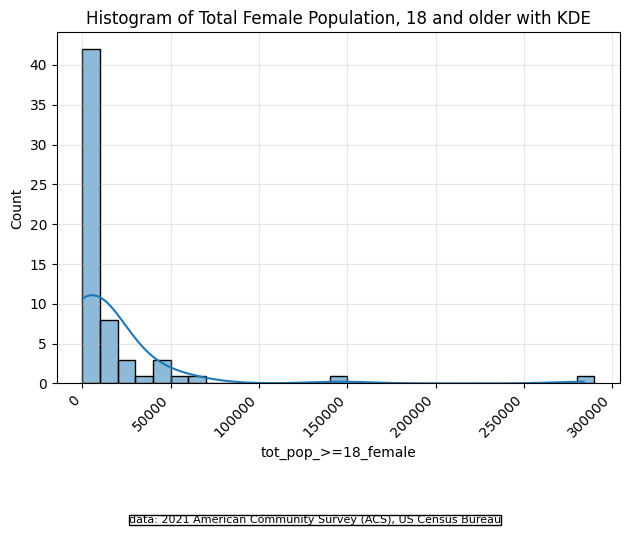

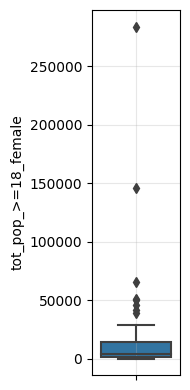

,tot_pop_>=18_female
count,61.000000
mean,16779.131148
std,41497.733332
min,2.000000
25%,1188.000000
50%,4231.000000
75%,14007.000000
max,283954.000000


In [13]:
explore_variable(
    gdf_demographics, 'tot_pop_>=18_female', 'Total Female Population, 18 and older', binwidth=10000, kde=True
)

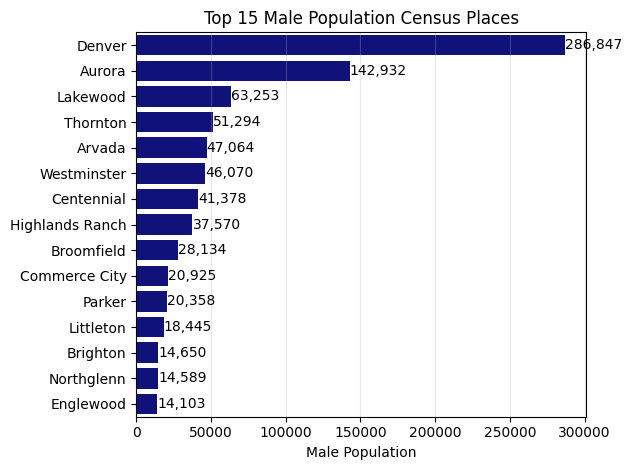

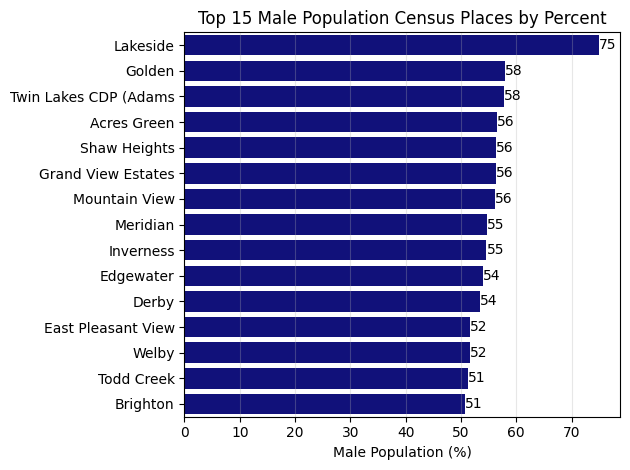

In [14]:
create_barplot(
    variable='tot_pop_>=18_male', 
    limit_start=0, limit_end=15,
    chart_title="Top 15 Male Population Census Places",
    xlabel="Male Population",
    color='darkblue', 
    orientation='horizontal', 
    asc=False,
    numbers=True
)

create_barplot(
    variable='tot_pop_>=18_male_%', 
    limit_start=0, limit_end=15,
    chart_title="Top 15 Male Population Census Places by Percent",
    xlabel="Male Population (%)",
    color='darkblue', 
    orientation='horizontal', 
    asc=False,
    numbers=True
)

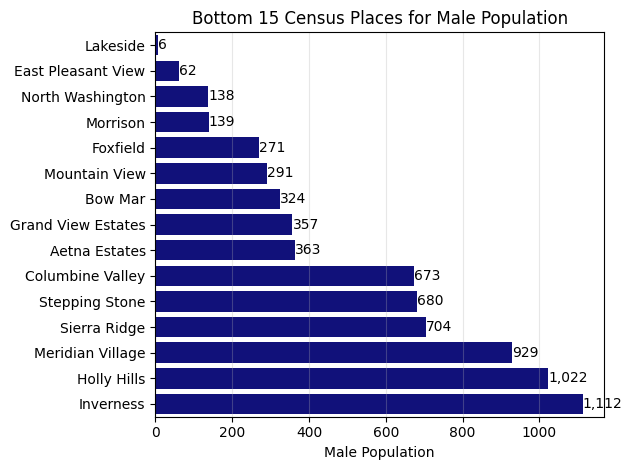

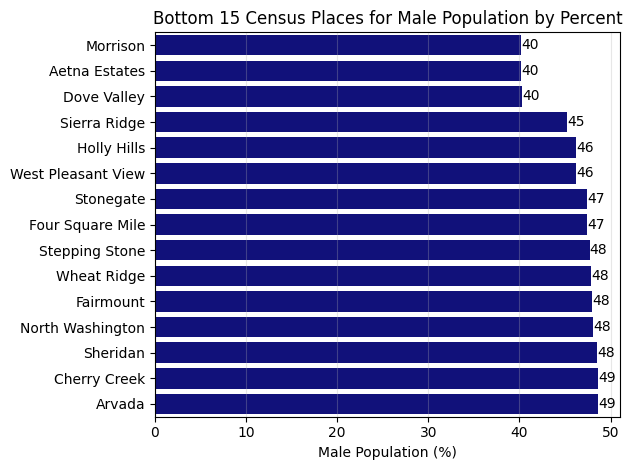

In [15]:
create_barplot(
    variable='tot_pop_>=18_male', 
    limit_start=0, limit_end=15,
    chart_title="Bottom 15 Census Places for Male Population",
    xlabel="Male Population",
    color='darkblue', 
    orientation='horizontal', 
    asc=True,
    numbers=True
)

create_barplot(
    variable='tot_pop_>=18_male_%', 
    limit_start=0, limit_end=15,
    chart_title="Bottom 15 Census Places for Male Population by Percent",
    xlabel="Male Population (%)",
    color='darkblue', 
    orientation='horizontal', 
    asc=True,
    numbers=True
)

### Target Occupations, a Summation of the Following:
- Agriculture, forestry, fishing and hunting, and mining
- Construction
- Professional, scientific, and management, and administrative and waste management services
- Educational services, and health care and social assistance
- Arts, entertainment, and recreation, and accommodation and food services

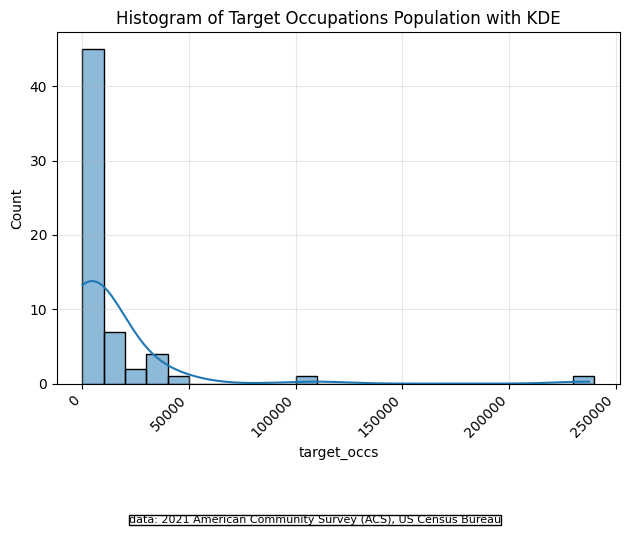

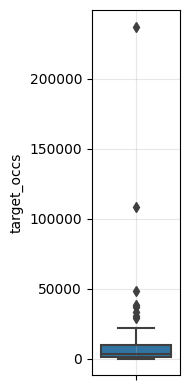

,target_occs
count,61.000000
mean,13029.213115
std,33697.934585
min,4.000000
25%,856.000000
50%,3211.000000
75%,10034.000000
max,237443.000000


In [16]:
explore_variable(
    gdf_demographics, 'target_occs', 'Target Occupations Population', binwidth=10000, kde=True, save=True
)

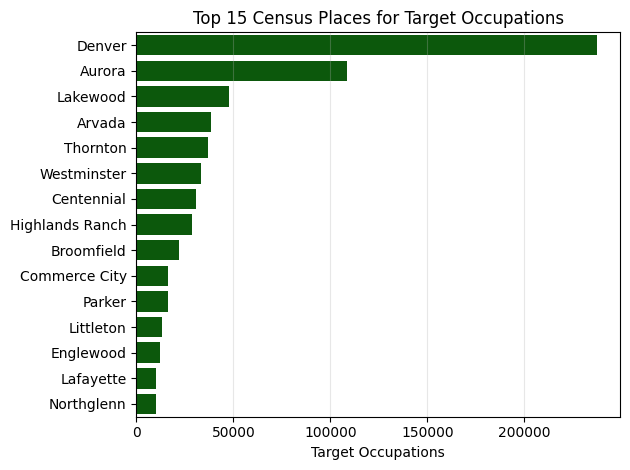

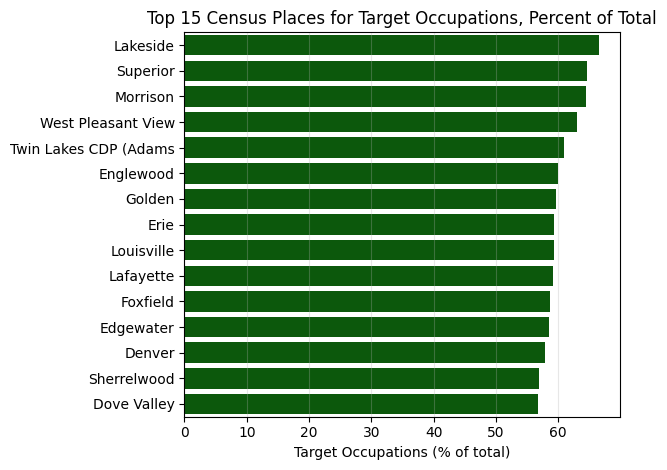

In [17]:
create_barplot(
    variable='target_occs', 
    limit_start=0, limit_end=15,
    chart_title="Top 15 Census Places for Target Occupations",
    xlabel="Target Occupations",
    color='darkgreen', 
    orientation='horizontal', 
    asc=False,
    numbers=False,
    save=True
)

create_barplot(
    variable='target_occs_%', 
    limit_start=0, limit_end=15,
    chart_title="Top 15 Census Places for Target Occupations, Percent of Total",
    xlabel="Target Occupations (% of total)",
    color='darkgreen', 
    orientation='horizontal', 
    asc=False,
    numbers=False,
)

In [18]:
gdf_demographics[[
    'occ_>=16_prof_sci_mgmt_admin_wastemgmt', 
    'occ_>=16_healthcare_socialasst_edu',
    'occ_>=16_arts_entrtain_rec_foodsrvc',
    'occ_>=16_construction',
    'occ_>=16_agg_forest_fish_hunt'
]].describe()

,occ_>=16_prof_sci_mgmt_admin_wastemgmt,occ_>=16_healthcare_socialasst_edu,occ_>=16_arts_entrtain_rec_foodsrvc,occ_>=16_construction,occ_>=16_agg_forest_fish_hunt
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,3874.868852,4859.475410,2188.639344,1836.852459,269.377049
std,10706.450044,12324.984611,5746.472547,4523.827350,593.381754
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,362.000000,384.000000,113.000000,74.000000,12.000000
50%,804.000000,1091.000000,516.000000,358.000000,68.000000
75%,2949.000000,3669.000000,1561.000000,1470.000000,235.000000
max,78393.000000,86650.000000,39740.000000,28706.000000,3954.000000


In [19]:
gdf_demographics[[
    'occ_>=16_prof_sci_mgmt_admin_wastemgmt_%', 
    'occ_>=16_healthcare_socialasst_edu_%',
    'occ_>=16_arts_entrtain_rec_foodsrvc_%',
    'occ_>=16_construction_%',
    'occ_>=16_agg_forest_fish_hunt_%'
]].describe()

,occ_>=16_prof_sci_mgmt_admin_wastemgmt_%,occ_>=16_healthcare_socialasst_edu_%,occ_>=16_arts_entrtain_rec_foodsrvc_%,occ_>=16_construction_%,occ_>=16_agg_forest_fish_hunt_%
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,16.016393,19.111475,9.300000,7.432787,1.232787
std,5.806065,5.340852,5.276046,4.948997,1.276939
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.400000,16.700000,6.500000,4.500000,0.500000
50%,16.200000,19.700000,8.600000,6.900000,1.100000
75%,19.500000,22.700000,10.700000,8.700000,1.600000
max,30.000000,33.300000,33.300000,31.400000,8.500000


#### Observations:
* Census Places w/ the highest number of select occupations occur w/in the largest cities of the approximate MSA.
* Census Places w/ the highest concentration of target occupations (% of total) appear to largely occur on the peripheral of Denver, but also include the City & County of Denver itself.
* When target occupations are more frequent it is almost always due to these categories:
    - Professional, scientific, and management, and administrative and waste management services
    - Educational services, and health care and social assistance
    - Check IQRs for totals and percentages above which confirms this
    - which may also be followed by:
        - Arts, entertainment, and recreation, and accommodation and food services

### Education

#### $\ge$ bachelors degree

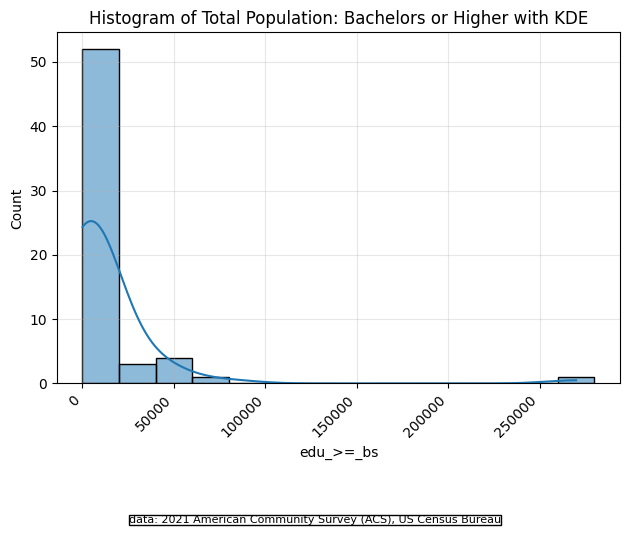

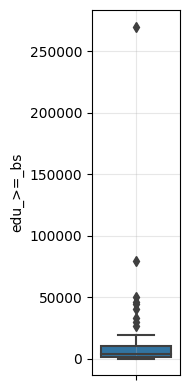

,edu_>=_bs
count,61.000000
mean,13830.704918
std,36654.422372
min,2.000000
25%,1025.000000
50%,3869.000000
75%,10231.000000
max,270034.000000


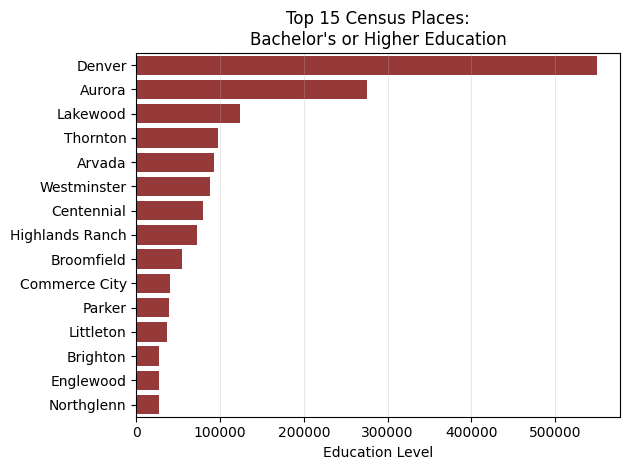

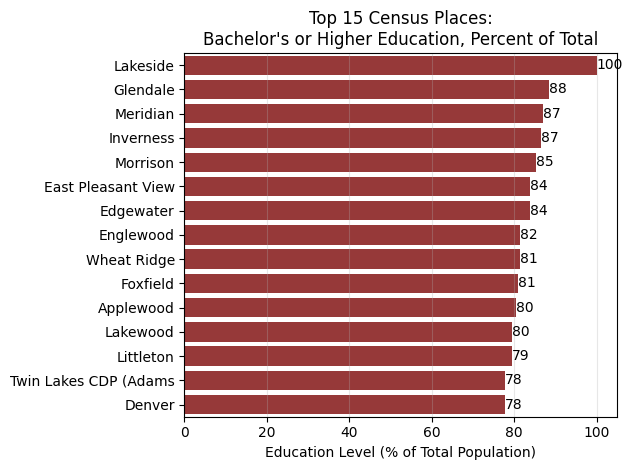

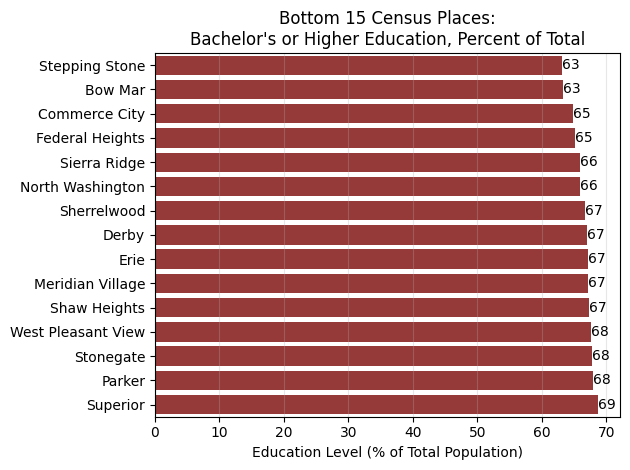

In [20]:
explore_variable(gdf_demographics, 'edu_>=_bs', "Total Population: Bachelors or Higher", 
                 binwidth=20000, kde=True)
create_barplot(
    variable='tot_pop_>=21', 
    limit_start=0, limit_end=15,
    chart_title="Top 15 Census Places:\nBachelor's or Higher Education",
    xlabel="Education Level",
    color='brown', 
    orientation='horizontal', 
    asc=False,
    numbers=False
)

create_barplot(
    variable='tot_pop_>=21_%', 
    limit_start=0, limit_end=15,
    chart_title="Top 15 Census Places:\nBachelor's or Higher Education, Percent of Total",
    xlabel="Education Level (% of Total Population)",
    color='brown', 
    orientation='horizontal', 
    asc=False,
    numbers=True
)

create_barplot(
    variable='tot_pop_>=21_%', 
    limit_start=0, limit_end=15,
    chart_title="Bottom 15 Census Places:\nBachelor's or Higher Education, Percent of Total",
    xlabel="Education Level (% of Total Population)",
    color='brown', 
    orientation='horizontal', 
    asc=True,
    numbers=True
)

#### $\ge$ HS Diploma

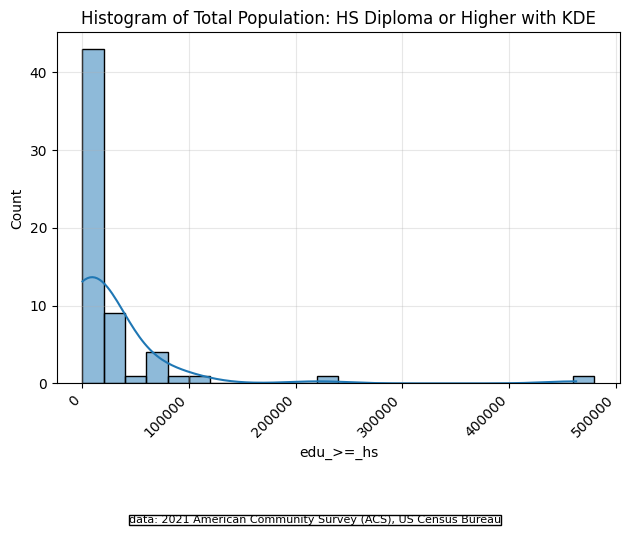

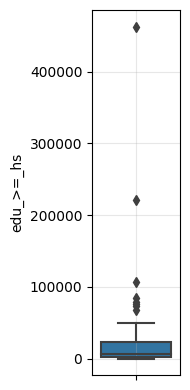

,edu_>=_hs
count,61.000000
mean,27411.344262
std,66914.278119
min,8.000000
25%,1975.000000
50%,6272.000000
75%,22642.000000
max,462861.000000


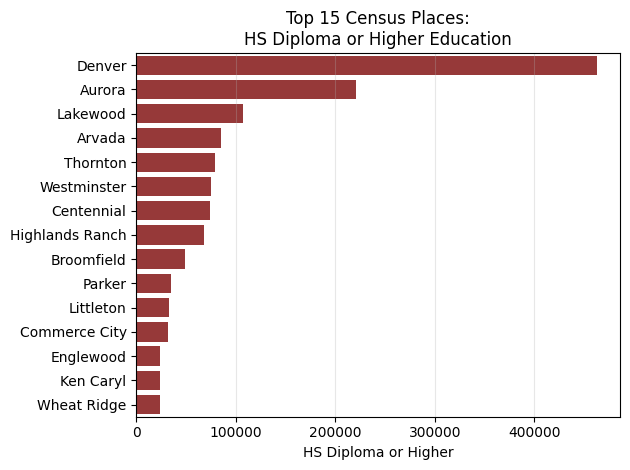

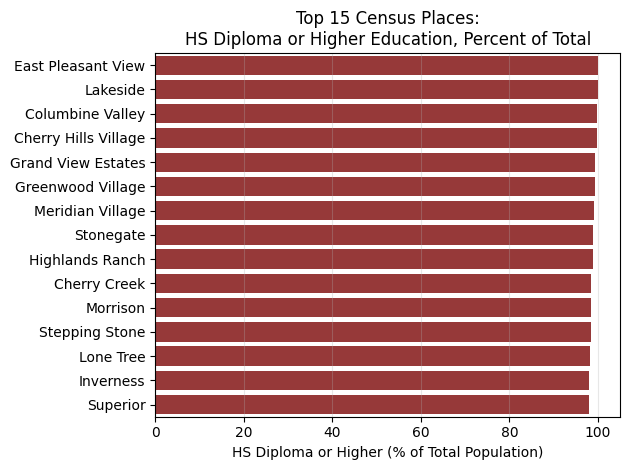

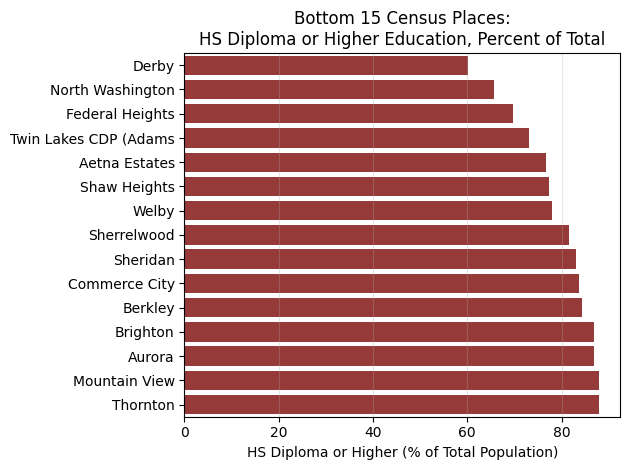

In [21]:
explore_variable(gdf_demographics, 'edu_>=_hs', "Total Population: HS Diploma or Higher", 
                 binwidth=20000, kde=True)
create_barplot(
    variable='edu_>=_hs', 
    limit_start=0, limit_end=15,
    chart_title="Top 15 Census Places:\nHS Diploma or Higher Education",
    xlabel="HS Diploma or Higher",
    color='brown', 
    orientation='horizontal', 
    asc=False,
    numbers=False,
    save=True
)

create_barplot(
    variable='edu_>=_hs_%', 
    limit_start=0, limit_end=15,
    chart_title="Top 15 Census Places:\nHS Diploma or Higher Education, Percent of Total",
    xlabel="HS Diploma or Higher (% of Total Population)",
    color='brown', 
    orientation='horizontal', 
    asc=False,
    numbers=False,
    save=True
)

create_barplot(
    variable='edu_>=_hs_%', 
    limit_start=0, limit_end=15,
    chart_title="Bottom 15 Census Places:\nHS Diploma or Higher Education, Percent of Total",
    xlabel="HS Diploma or Higher (% of Total Population)",
    color='brown', 
    orientation='horizontal', 
    asc=True,
    numbers=False
)

#### Observations:
* Census Places with a higher total population having at least a bachelor's degree are generally found in more populated areas (Denver, Aurora, Lakewood, Thornton, etc.)
* The minimum percent of a Place total population which has at least a bachelors degree is 63%
* Census Places with a higher percentage of bachelors or higher holders are generally smaller cities with a smaller total population

## Total Population

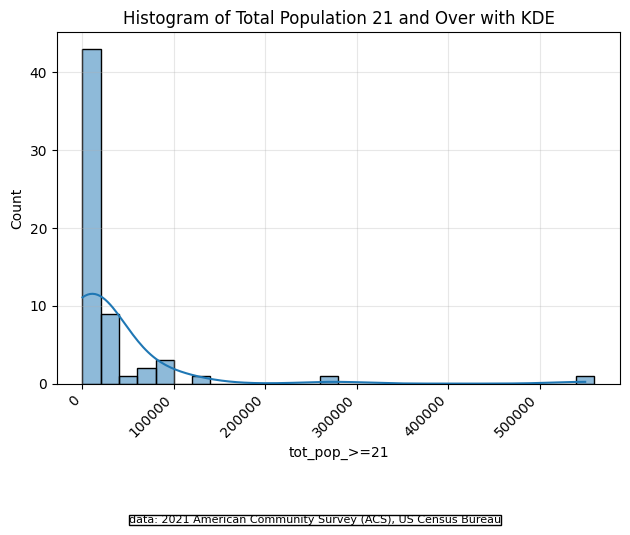

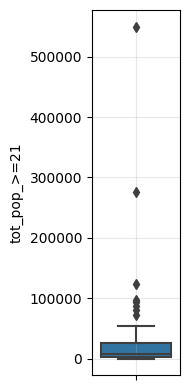

,tot_pop_>=21
count,61.000000
mean,32092.704918
std,79842.179529
min,8.000000
25%,2155.000000
50%,7769.000000
75%,26289.000000
max,549933.000000


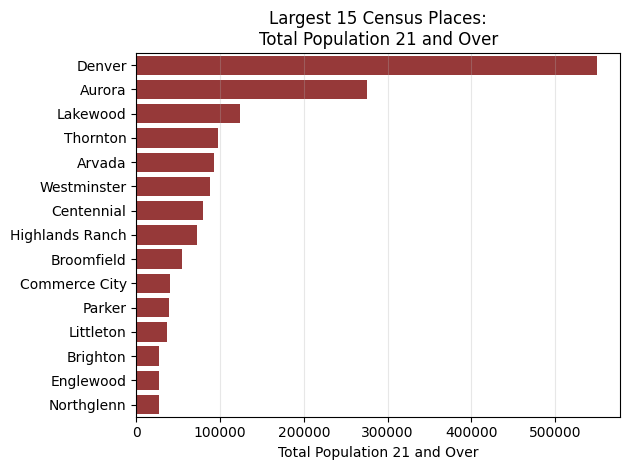

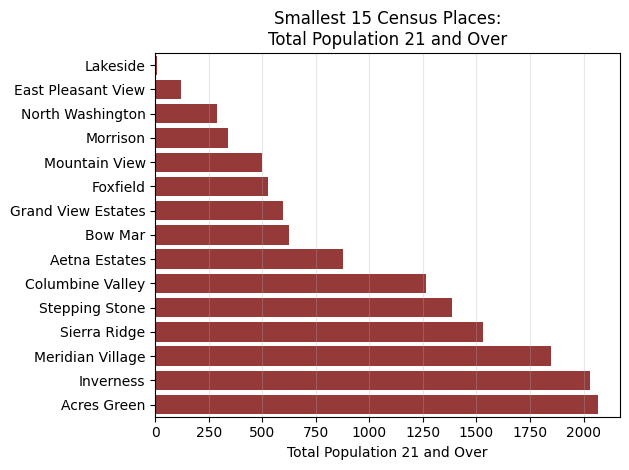

In [22]:
explore_variable(gdf_demographics, 'tot_pop_>=21', 'Total Population 21 and Over', 
                 binwidth=20000, kde=True, save=True)
create_barplot(
    variable='tot_pop_>=21', 
    limit_start=0, limit_end=15,
    chart_title="Largest 15 Census Places:\nTotal Population 21 and Over",
    xlabel="Total Population 21 and Over",
    color='brown', 
    orientation='horizontal', 
    asc=False,
    numbers=False,
    save=True
)
plt.savefig('')

create_barplot(
    variable='tot_pop_>=21', 
    limit_start=0, limit_end=15,
    chart_title="Smallest 15 Census Places:\nTotal Population 21 and Over",
    xlabel="Total Population 21 and Over",
    color='brown', 
    orientation='horizontal', 
    asc=True,
    numbers=False,
    save=True
)

#### Observations:
* Of the 61 Census Places w/in the approximate MSA:
    - 59 or 85% have a population 21 and over of less than 50,000
    - 6  or ~10% fall between 50K and 100K total population 21 and over
* Denver, Aurora, and Lakewood are the only Census Places with populations over 100,000 people (550K, 276K, 124K).

### Population Density for 21 and Older

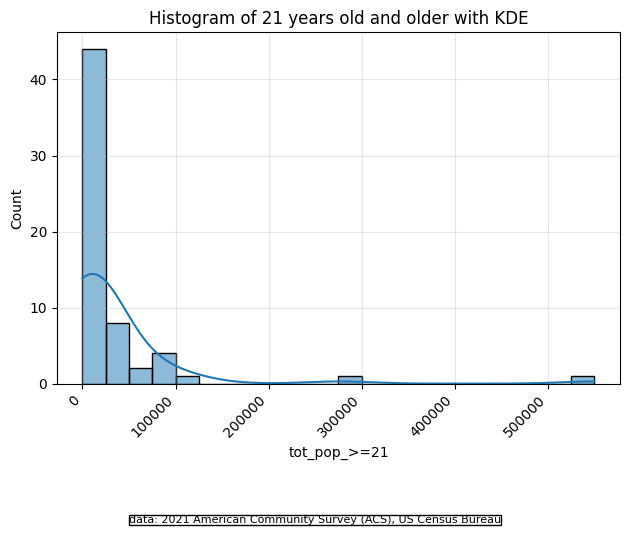

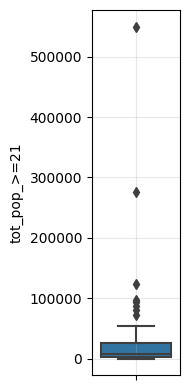

,tot_pop_>=21
count,61.000000
mean,32092.704918
std,79842.179529
min,8.000000
25%,2155.000000
50%,7769.000000
75%,26289.000000
max,549933.000000


In [23]:
explore_variable(gdf_demographics, 'tot_pop_>=21', '21 years old and older', binwidth=25000, kde=True)

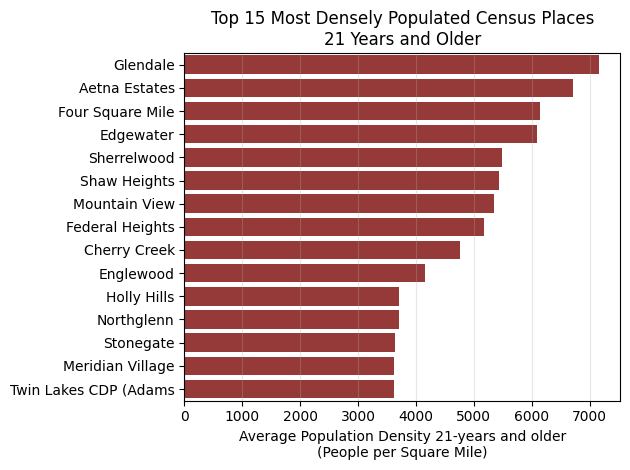

In [24]:
lim = 15
density = gdf_demographics[['NAME', 'avg_pop_density_>=21']].sort_values(
    by='avg_pop_density_>=21', 
    ascending=False
)[:lim]

ax = sns.barplot(
    y=[" ".join(i.split(' ')[:-2]) for i in density['NAME']], 
    x='avg_pop_density_>=21', 
    color='brown',
    orient='horizontal',
    data=density
);

plt.title(f'Top {lim} Most Densely Populated Census Places\n21 Years and Older');
plt.xlabel('Average Population Density 21-years and older\n(People per Square Mile)')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig("Top 15 Most Densely Populated MSA Places.png")

plt.show()

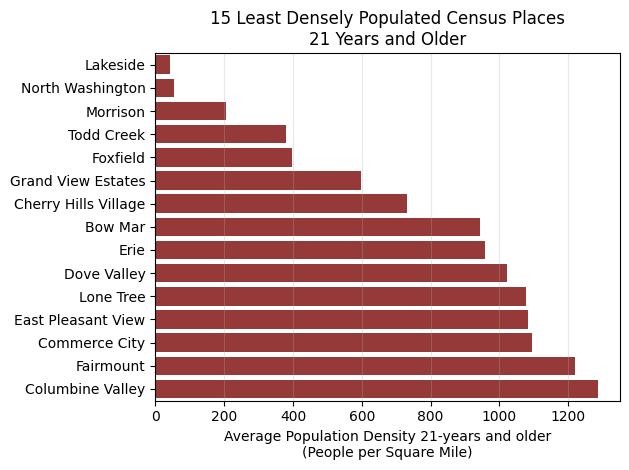

In [25]:
lim = 15
density = gdf_demographics[['NAME', 'avg_pop_density_>=21']].sort_values(
    by='avg_pop_density_>=21', 
    ascending=True
)[:lim]

ax = sns.barplot(
    y=[" ".join(i.split(' ')[:-2]) for i in density['NAME']], 
    x='avg_pop_density_>=21', 
    color='brown',
    orient='horizontal',
    data=density
);

plt.title(f'{lim} Least Densely Populated Census Places\n21 Years and Older');
plt.xlabel('Average Population Density 21-years and older\n(People per Square Mile)')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig("15 Least Densely Populated MSA Places.png")

plt.show()

#### Observations
* Denver has the largest number of people 21 and older within the approximate MSA, however, Denver also has a large geospatial area including Denver International Airport (DIA) and therefore a comparatively small population density.
* this histogram confirms that within the approximate Denver-Lakewood-Aurora metro area there are 10 (16%) larger Census Places with a population of 21-y.o. and older greater than 4,000 people per mi^2, however, a majority of Census Places are under 4,000 persons per square mile (85%).
* Several places w/ higher median and mean household incomes have lower population densities, including Bow Mar, Cherry Hills Village, etc.

### Brewery Density

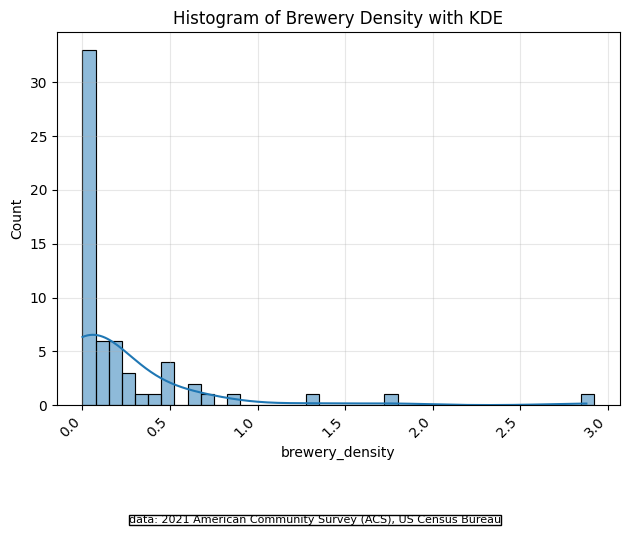

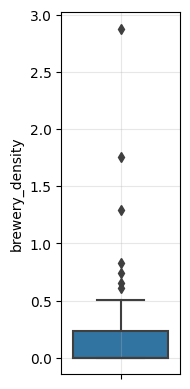

,brewery_density
count,61.000000
mean,0.231561
std,0.475275
min,0.000000
25%,0.000000
50%,0.000000
75%,0.237735
max,2.879202


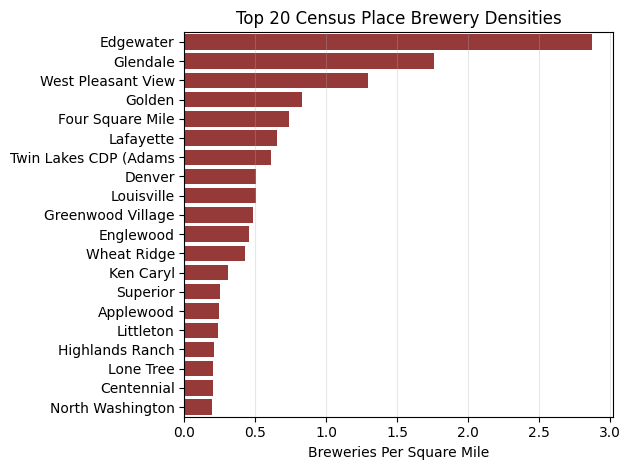

In [26]:
# plt.xticks(ha='left', rotation=45)
explore_variable(gdf_demographics, 'brewery_density', 'Brewery Density', binwidth=0.075, kde=True, save=True)
create_barplot(
    variable='brewery_density', 
    limit_start=0, limit_end=20,
    chart_title="Top 20 Census Place Brewery Densities",
    xlabel="Breweries Per Square Mile",
    color='brown', 
    orientation='horizontal', 
    asc=False,
    numbers=False,
    save=True
)

#### Observations:
* We can use Denver as a benchmark w/ a sureal 77 breweries w/ its geographic boundary of ~153 square miles, including DIA
* We find a high number of breweries w/in Denver, however, given its significantly higher total population this seems reasonable
* Golden, West Pleasant View, and Applewood are relatively close together and collectively have among the higest brewery densities per Census Place (0.8, 1.25 and 0.25 vs Denver: 0.5).
    - They are close to the NREL, a Colorado State Trooper station, Colorado Mills Mall, the Applewood business district, and nearby Lakewood w/ a higher total population 21 and older
    - Golden is where the massive Coors Brewery complex is located, w/ the world's largest single-site brewing facility

### Work From Home

count       61.000000
mean      3550.688525
std       9445.825137
min          0.000000
25%        275.000000
50%        776.000000
75%       2945.000000
max      69543.000000
Name: commute_wfh, dtype: float64

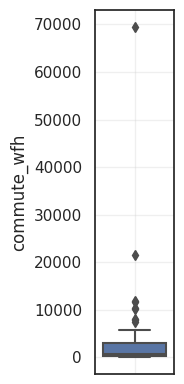

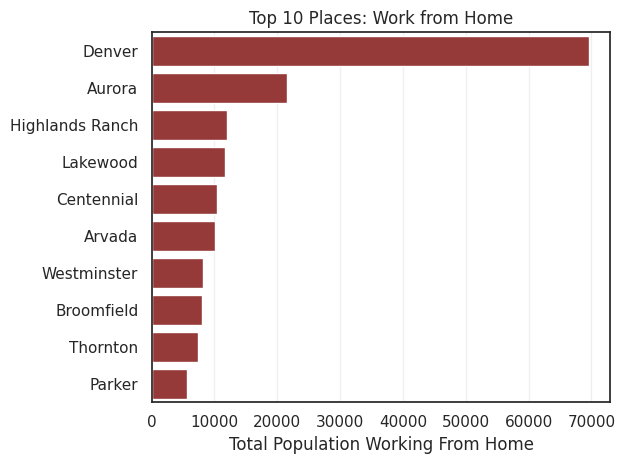

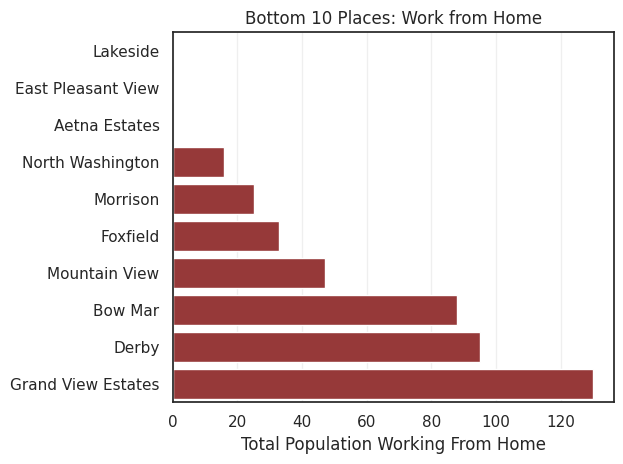

In [41]:
display(gdf_demographics['commute_wfh'].describe())

fig = plt.figure(figsize=(2, 4))   # Adjust the figure size values as needed
ax = fig.gca()                     # create an axis for plotting - get current axis (GCA)
sns.boxplot(data=gdf_demographics, y='commute_wfh', ax=ax);
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("boxplot_commute_wfh.png")
plt.show()

create_barplot(
    variable='commute_wfh', 
    limit_start=0, limit_end=10,
    chart_title="Top 10 Places: Work from Home",
    xlabel="Total Population Working From Home",
    color='brown', 
    orientation='horizontal', 
    asc=False,
    numbers=False,
    save=True
)

create_barplot(
    variable='commute_wfh', 
    limit_start=0, limit_end=10,
    chart_title="Bottom 10 Places: Work from Home",
    xlabel="Total Population Working From Home",
    color='brown', 
    orientation='horizontal', 
    asc=True,
    numbers=False,
    save=True
)

### Different Residence in the Year Prior to the ACS Survey

count       61.000000
mean      3550.688525
std       9445.825137
min          0.000000
25%        275.000000
50%        776.000000
75%       2945.000000
max      69543.000000
Name: commute_wfh, dtype: float64

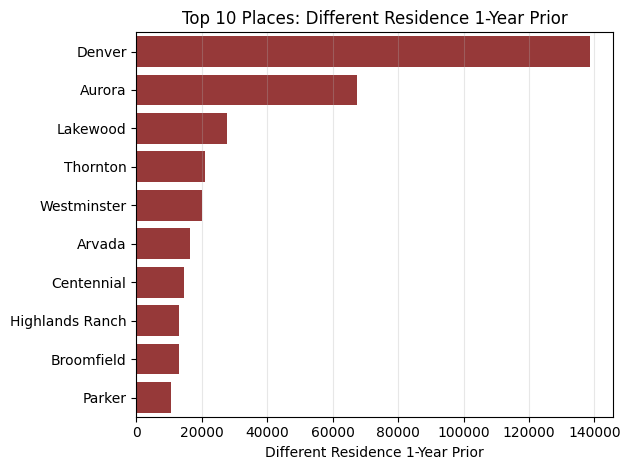

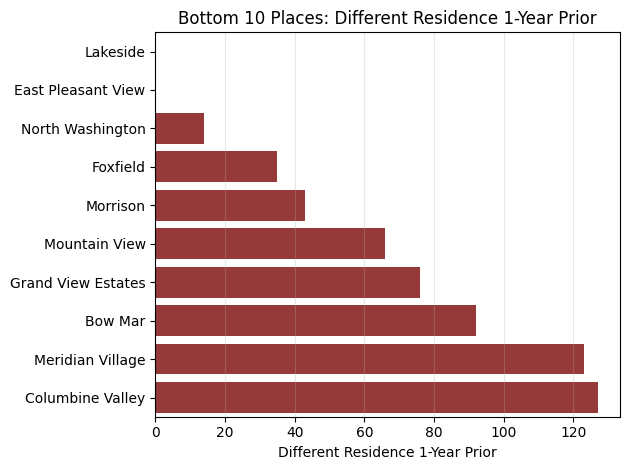

In [30]:
display(gdf_demographics['commute_wfh'].describe())

create_barplot(
    variable='diff_res_1yr', 
    limit_start=0, limit_end=10,
    chart_title="Top 10 Places: Different Residence 1-Year Prior",
    xlabel="Different Residence 1-Year Prior",
    color='brown', 
    orientation='horizontal', 
    asc=False,
    numbers=False,
    save=True
)

create_barplot(
    variable='diff_res_1yr', 
    limit_start=0, limit_end=10,
    chart_title="Bottom 10 Places: Different Residence 1-Year Prior",
    xlabel="Different Residence 1-Year Prior",
    color='brown', 
    orientation='horizontal', 
    asc=True,
    numbers=False,
#     save=True
)

## Principle Components Analysis
* "Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD." - SKLearn document string.
* Linear algebra is used to determine how much explained variance is captured by principle components which are data/variable projections into lower dimensional space.  
    - This enables us to determine which features have the most variance and therefore figure prominently in any analysis in understanding how they might sway an outcome
    - the remaining features which have less variance may still hold theoretical importance in an analysis, however, will have smaller flucuation in values encountered

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

### Interesting Observation Regarding DataFrame Orientation & Principle Component Analysis (PCA):
* We present a DataFrame below w/ Census Places as indices vs variables captured as columns per canonical convention:
    - In this DataFrame format/orientation we are performing PCA on the Places & effectively attempting to understand the relationships or patterns between Places based on the given variables. This approach is useful for clustering or categorization of Places based on their characteristics.
        - PCA will provide us w/ info on how the Places are similar or different from each other w.r.t. the variables.
    - When we plot PC1 vs PC2 (assuming most of the explained variance occurs w/ PC1 to sucessfully do this), we will see how cities relate to each other in terms of the variables.
* Concerning the transposed DataFrame (variables as indices, Census Places as columns):
    - In this DF orientation we are performing PCA on the variables, which means we are trying to understand the relationships or patterns between the variables based on the cities.
    - This PCA provides us w/ info. on how the variables are correlated or uncorrelated with each other across Places. Groupings of Places indicate how Places cluster or relate to each other based on the variability in the original features. 
    - for the transposed DF PCA w/ variables as indices and cities as columns variable groupings in the PC1 vs. PC2 plot indicate how variables are related to each other based on their influence on the cities and shows which variables tend to vary together across the cities.
        - **Variables that are close to each other in the plot are positively correlated, meaning that they tend to increase or decrease together across the cities. Variables that are far apart are less correlated or might even be negatively correlated, indicating that they tend to move in opposite directions across the cities.**
    - To interpret groupings effectively we look at the loadings of the original variables on the principal components. The loadings indicate how each variable contributes to the principal components. Variables with high absolute loadings on a particular component are strongly associated with that component & this can help understand the variables' contribution to the patterns seen in the PC1 vs. PC2 plot.
    
* **Since our primary interest is in understanding the relationships between cities (for clustering and city-to-city comparisons) we use the conventional rectangular dataframe orientation where instances are represented as rows.**
    - we will also however use the alternate DF rectangular orientation to determine which variables are closely associated and therefore avoid confounding our analysis by dropping the most similar variables; as we seek to cleverly reduce dimensionality
* If we were more interested in understanding the relationships between variables (e.g. for identifying which variables are most correlated or contribute the most to the data's variance) then the transposed dataframe would more appropriate.

In [32]:
sel_var = [
 'NAMELSAD',
 'num_breweries',
 'mar_child',
 'hh_female',
 'edu_>=_hs',
 'diff_res_1yr',
 'commute_wfh',
 'private_wage_salary_worker',
 'hhinc_50k-74.999k',
 'hhinc_75k-99.999k',
 'hhinc_100k-149.999k',
 'hhinc_150k-199.999k',
 'hhinc_>=200k',
 'owner_occupied_mortgage',
 'tot_pop_25-34',
 'tot_pop_35-44',
 'tot_pop_45-54',
 'tot_pop_>=18_male',
 'tot_pop_white',
 'tot_pop_hisp',
 'target_occs',
]
print(len(sel_var), "total variables after selection")

def get_select_variables(gdf_demographics, select_variables, transpose=False, printShape=True):
    """Takes the GeoDataFrame for Census Bureau demographics, and desired variables
    params:
    gdf_demographics{GeoPandas GeoDataFrame} - Main GeoDataFrame in which nearly all project variables are held
    select_varaibles{list} - list of variables to be used for analysis
    transpose{bool} - if True transposes the dataframe. Default orientation: index-cities, columns-variables
    printShape{bool} - prints the shape of the DataFrame; to be used as as reference
    returns:
    GeoDataFrame of select variables in desired orientation
    """
    sel_df_demo = gdf_demographics[select_variables]
    sel_df_demo.set_index('NAMELSAD', inplace=True)
    
    if transpose:
        sel_df_demo = sel_df_demo.T
    
    if printShape:
        print("Shape:", sel_df_demo.shape)
    
    return sel_df_demo
    

sel_df_demo = get_select_variables(gdf_demographics, sel_var, transpose=False)
sel_df_demo

21 total variables after selection
Shape: (61, 20)


,num_breweries,mar_child,hh_female,edu_>=_hs,diff_res_1yr,commute_wfh,private_wage_salary_worker,hhinc_50k-74.999k,hhinc_75k-99.999k,hhinc_100k-149.999k,hhinc_150k-199.999k,hhinc_>=200k,owner_occupied_mortgage,tot_pop_25-34,tot_pop_35-44,tot_pop_45-54,tot_pop_>=18_male,tot_pop_white,tot_pop_hisp,target_occs
NAMELSAD,,,,,,,,,,,,,,,,,,,,
Erie town,2,3957,1532,18336,4444,3436,12001,957,1143,2174,2241,2252,6983,3228,5191,4359,10208,25973,2717,8952
Meridian Village CDP,0,503,197,1809,123,337,1379,46,47,158,190,439,826,524,541,322,929,1996,90,808
Shaw Heights CDP,0,380,262,2716,938,256,2682,279,276,300,187,127,949,849,887,557,2297,3760,2561,1713
Mountain View town,0,69,43,416,66,47,360,40,42,80,26,31,148,155,141,87,291,560,178,208
Centennial city,6,10408,8339,73862,14427,10338,46973,5855,5074,8835,5875,8410,23997,12203,15989,14677,41378,89527,9693,30623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Commerce City city,0,6378,3856,31575,9134,3504,25390,2949,2984,5007,2299,1352,11584,8902,9999,8592,20925,45086,29896,16163
Broomfield city,4,6690,6789,49148,12956,7975,33883,4562,3675,6421,4148,5420,14026,11168,10708,10235,28134,60366,9409,22088
Lakeside town,0,0,2,8,0,0,4,0,0,2,0,0,0,0,0,0,6,8,0,4


In [33]:
def scale_dataframe(df):
    """Function to scale a Pandas DataFrame or GeoPandasGeoDataFrame.
    args:
    df{df} - the dataframe to be scaled
    Returns:
    scaled dataframe
    """
#     preprocessing.scale(df)    # alternative scaler
    return StandardScaler().fit_transform(df)

def carryout_pca(scaled_data, n_components=None):
    """Uses SKLearn library to carrout Principle Components Analysis (PCA).
    args: 
    n_components{int} - the number of principle components
    scaled_data{df} - a dataframe of already scaled values
    returns:
    pca_data{df} - PCA transformed dataframe of [scaled] data
    pca{SkLearn PCA class object}
    """
    pca = PCA(n_components=n_components) # default parameter None will use all variables passed
    pca.fit(scaled_data)                     # do the linear algebra math
    pca_data = pca.transform(scaled_data)    # get PCS coordinates for scaled data
    
    return pca_data, pca


scaled_data = scale_dataframe(sel_df_demo)
pca_data, pca = carryout_pca(scaled_data, n_components=None)

In [34]:
# https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/

def plot_explained_variance_ratio(pca, pcs=None):
    """Function to plot explained variance ratio, which is the percentage of variance
    explained by each of the selected Principle Components (PCs).
    args:
    pca{SKLearn PCA class object} - PCA object after fitting data
    pcs - number of principle components
    returns
    plot of number of PCs vs cummulative explained variance ratio
    """
    # Explained variance
    if pcs is None:
        plt.plot(
            range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_.cumsum(), 
            marker='o', linestyle='--'
        );
    elif pcs is not None:
        assert pcs <= len(pca.explained_variance_ratio_), "More Principle Components (PCs) than variables"
        plt.plot(
            range(1, pcs + 1), 
            pca.explained_variance_ratio_.cumsum()[:pcs], 
            marker='o', linestyle='--'
        );
    plt.title("Explained Variance by Principle Component");
    plt.xlabel("Number of Principle Components");
    plt.ylabel("Cumulative Explained Variance");
    plt.grid(alpha=0.3)
    
    return plt.show()

### Create Scree Plot
* Indicates how much variance is captured per principle component

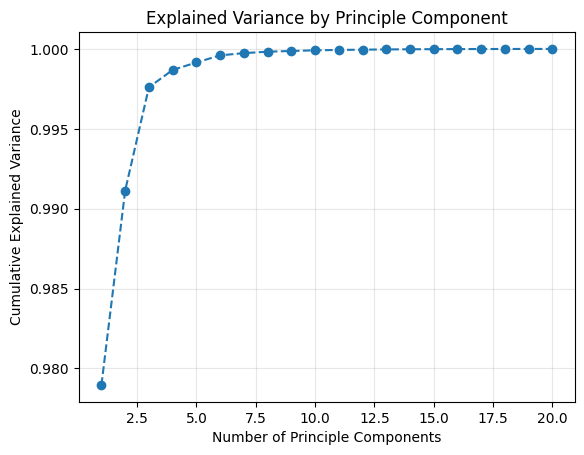

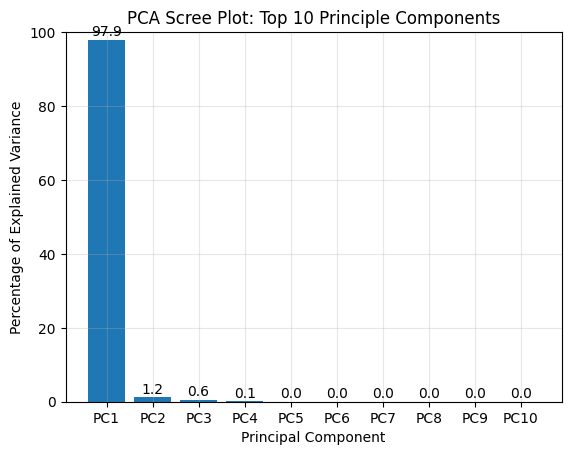

Explained Variance per PC:
20 variables total
PC1.....97.9%
PC2......1.2%
PC3......0.6%
PC4......0.1%
PC5......0.0%
PC6......0.0%
PC7......0.0%
PC8......0.0%
PC9......0.0%
PC10.....0.0%

Loadings for PC1:
target_occs                   0.225888
private_wage_salary_worker    0.225828
edu_>=_hs                     0.225780
tot_pop_35-44                 0.225756
tot_pop_>=18_male             0.225721
hhinc_100k-149.999k           0.225400
hhinc_75k-99.999k             0.225299
diff_res_1yr                  0.225221
tot_pop_white                 0.224915
hhinc_50k-74.999k             0.224570
hh_female                     0.224553
tot_pop_25-34                 0.224241
tot_pop_45-54                 0.224011
hhinc_150k-199.999k           0.224003
owner_occupied_mortgage       0.223872
commute_wfh                   0.223566
mar_child                     0.221552
tot_pop_hisp                  0.220788
hhinc_>=200k                  0.218562
num_breweries                 0.212150
dtype: float64


In [35]:
def create_scree_plot(pca, num_pcs):
    """
    Makes Scree Plot of Principle Components. Because of the math, PCs will always decrease 
    in explained variance after PC1.
    args:
    pca{SKLearn PCA class object} - PCA object after [scaled] data has been fit & transformed
    num_pcs{int} - Takes as an arugment the number of principle components
    returns:
    Scree Plot which is a visualization of the explained variance of principle components
    """
    perc_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)  
    labels = ['PC' + str(x) for x in range(1, len(perc_var)+1)]

    plt.bar(x=range(1, num_pcs+1), height=perc_var[:num_pcs], tick_label=labels[:num_pcs])
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
#     plt.xticks(ha='center', rotation=90)
    for i, v in enumerate(perc_var[:num_pcs]):
        plt.text(i+1, v+1, str(v), ha='center', fontsize=10)

    plt.yticks()
    plt.ylim(0, 100)
    plt.title(f'PCA Scree Plot: Top {num_pcs} Principle Components')
    plt.grid(alpha=0.3)
    return plt.show()

def print_explained_variance_per_pc(pca, pca_limit=None):
    """Prints a list of explained variance per Principle Component (PC) for PCA.
    args:
    pca{SKLearn PCA class object} - PCA object after [scaled] data has been fit & transformed
    pca_limit{int} - limits the number of PCs returned, default: None so all are returned
    """
    print(f"Explained Variance per PC:\n{len(pca.explained_variance_ratio_)} variables total")
    for i, variance in enumerate(pca.explained_variance_ratio_[:pca_limit]):
        print(f"PC{i + 1:.<5}{variance:.>6.1%}")

def print_loadings_per_pc(pca, sel_df_demographics, pcs, var_limit, saveLoadings=None):
    """A 'loading' is how much a given variable influences a PC.
    Given the number of desired Principle Components (PCs) function will print the variable composition of each
    PC desired, sorted by most to least explained variance.
    args:
    pca{SKLearn PCA class object} - PCA object after [scaled] data has been fit & transformed
    sel_df_demographics{} - 
    pcs{int} - the number of desired PCs
    var_limit{int} - a limit can be specified to get the top vars after a descending sort
    saveLoadings{bool} - if True will save PC1 Loadings in Excel spreadsheet format.
    """
    assert pcs is not None, "Please enter an integer for PCs"
    
    pc_num = 0
    while pc_num < pcs:   # for our data 2 PCs has been demonstrated to capture most of variance
        # Retrieve Principle Component (PC) and the breakdown of variables that comprise PC
        loading_scores = pd.Series(pca.components_[pc_num], index=sel_df_demographics.columns)
        # sort the loading scores based on their magnitude
        sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

        # get the names of the top variables
        var = sorted_loading_scores[0:var_limit].index.values

        ## print the var names and their scores (can be +/-)
        # temporarily print all variables then revert back to save memory where possible
        with pd.option_context("display.max_rows", 100):
            print(f"\nLoadings for PC{pc_num + 1}:\n{loading_scores[var]}")
        
        if saveLoadings is not None:
            os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/models/PCA')
            loading_scores[var].to_excel(saveLoadings, )

        pc_num += 1
    
    print('*', len(loading_scores), " variables total across all PCs", sep='')
    

plot_explained_variance_ratio(pca, pcs=None)
create_scree_plot(pca, num_pcs=10)
print_explained_variance_per_pc(pca, pca_limit=10)

# print_loadings_per_pc(pca, sel_df_demo, 1, None, saveLoadings='PCA_places_Loadings_ROUND6.xlsx')
# print_loadings_per_pc(pca, sel_df_demo, 1, None, saveLoadings='PCA_vars_Loadings_ROUND6.xlsx')
print_loadings_per_pc(pca, sel_df_demo, 1, None)

### Scree Plot Observations:
* Almost all of the variation is along the 1st Principle Component (PC) 
    - a 2-D graph using PC1 and PC2 will help helpful in illustrating our data

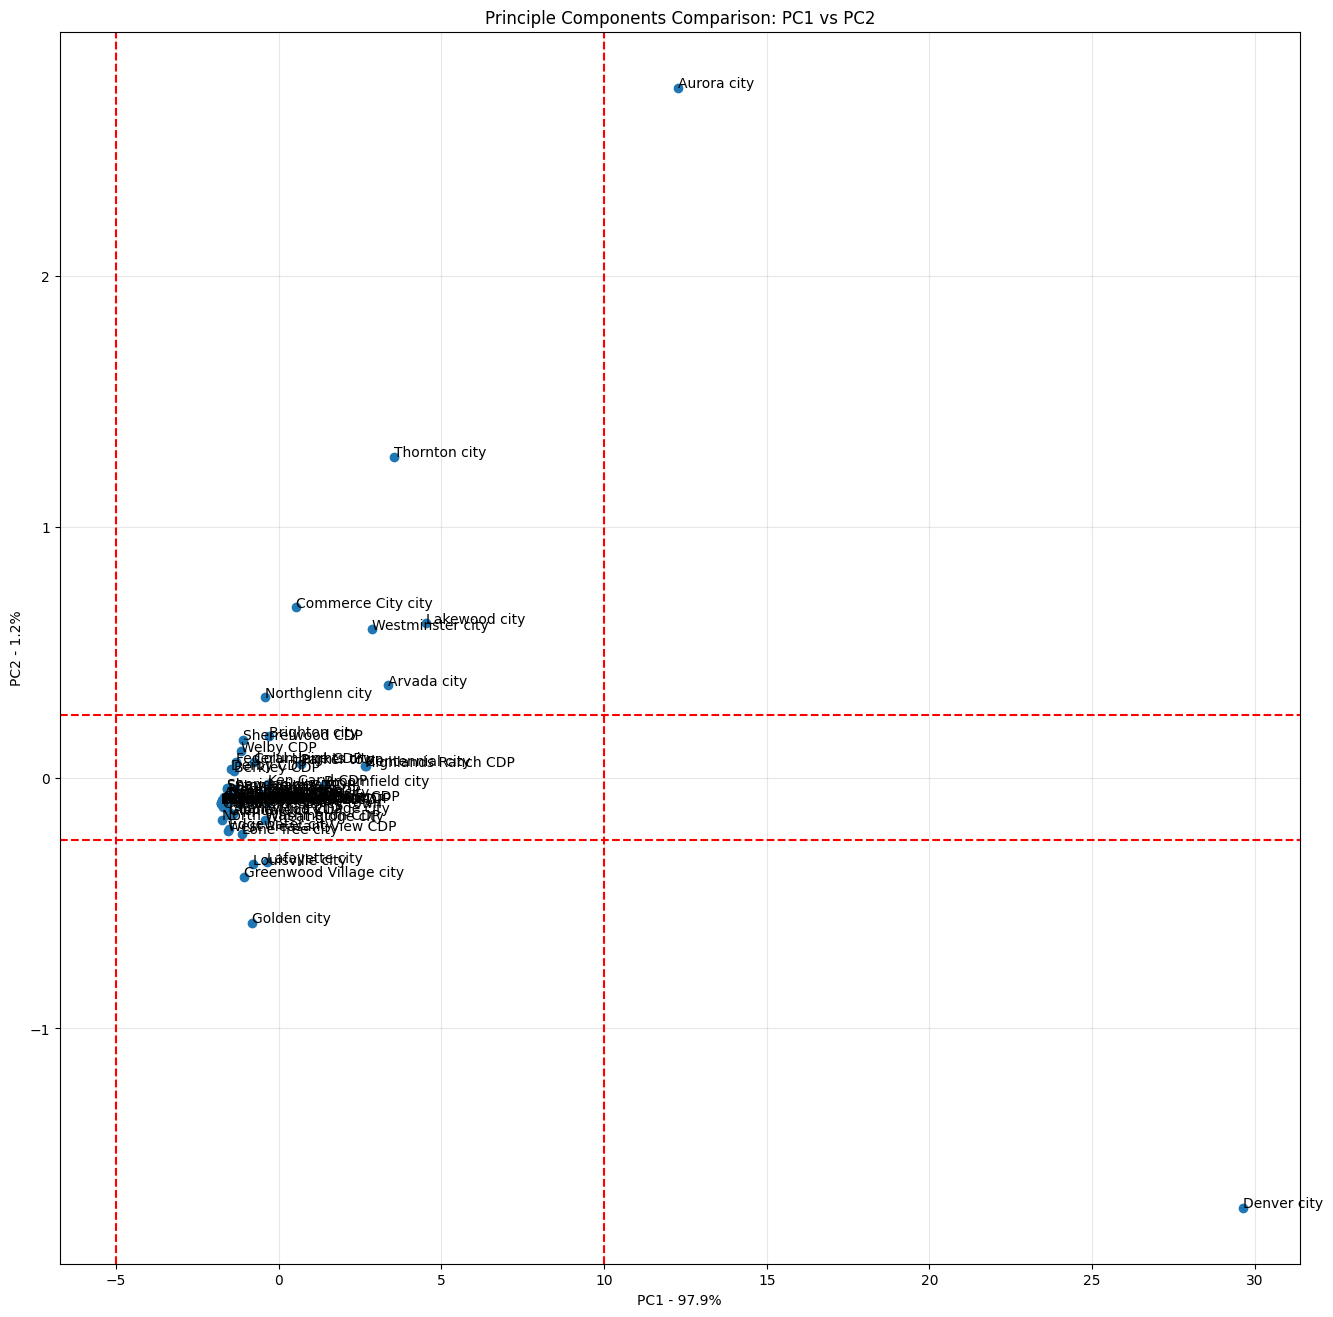

In [36]:
def plot_pc1_vs_pc2(pca, pca_data, sel_df_demo, figName=None):
    """Plots PC1 vs PC2 enabling a visualization of patterns.
    See https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py
    pca{SKLearn PCA class object} - PCA object after [scaled] data has been fit & transformed
    pca_data{df} - df of SkLearn pca class object
    sel_df_demo{df} - needed to grab column names
    figName{str or None(default)} - if a figure name is passed then the figure is saved under the string passed
    """
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    
    pca_df = pd.DataFrame(pca_data, index=sel_df_demo.index, columns=labels)

    fig = plt.figure(figsize=(16, 16))   # change back to 8,8 or less for saving figure as a scalable png
    plt.scatter(pca_df.PC1, pca_df.PC2)

    plt.title('Principle Components Comparison: PC1 vs PC2')
    plt.xlabel('PC1 - {0}%'.format(per_var[0]))
    plt.ylabel('PC2 - {0}%'.format(per_var[1]))
    plt.grid(alpha=0.3)

    plt.axvline(-5, linestyle='--', color='r');
    plt.axvline(10, linestyle='--', color='r');
    
    plt.axhline(-0.25, linestyle='--', color='r');
    plt.axhline(0.25, linestyle='--', color='r');
    
    for sample in pca_df.index:
        plt.annotate(sample, (pca_df['PC1'].loc[sample], pca_df['PC2'].loc[sample]))
    
    if figName is not None:
        os.chdir("/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/models/PCA")
        plt.savefig(figName)
        
    plt.show()    
    return pca_df


# pca_df = plot_pc1_vs_pc2(pca, pca_data, sel_df_demo, figName="PCA_places_PC1vsPC2_ROUND6.png")
# pca_df = plot_pc1_vs_pc2(pca, pca_data, sel_df_demo, figName="PCA_vars_PC1vsPC2_ROUND6.png")
pca_df = plot_pc1_vs_pc2(pca, pca_data, sel_df_demo)
# pca_df[['PC1', 'PC2']]

In [37]:
def get_PC1vsPC2_groupings(pca_df, pc1_lower, pc1_upper, pc2_lower, pc2_upper):
    """Function to help parse & understand groupings (either Census Places, or variables).
    args: upper and lower boundaries for both PC1 & PC2
    returns: Pandas Series of PC1 & PC2 values meeting critera
    """
    assert (pc1_lower is not None) and (pc1_upper is not None) and \
    (pc2_lower is not None) and (pc2_upper is not None), "Need to pass numbers as 'None' is not acceptable"
    return pca_df[
        (pca_df['PC1'] > pc1_lower) & (pca_df['PC1'] < pc1_upper) & \
        (pca_df['PC2'] > pc2_lower) & (pca_df['PC2'] < pc2_upper)
    ][['PC1', 'PC2']]
    

pc1_pc2_grouping_largest = get_PC1vsPC2_groupings(pca_df, 
                       pc1_lower=-5, pc1_upper=10, 
                       pc2_lower=-0.25, pc2_upper=0.25
                      ).sort_values(['PC1', 'PC2'], ascending=False)
print(len(pc1_pc2_grouping_largest))
pc1_pc2_grouping_largest

49


,PC1,PC2
NAMELSAD,,
Centennial city,2.682164,0.046622
Highlands Ranch CDP,2.650399,0.044510
Broomfield city,1.387331,-0.030444
Parker town,0.671499,0.054622
Littleton city,0.110384,-0.075758
Brighton city,-0.286807,0.165470
Ken Caryl CDP,-0.319073,-0.025295
Englewood city,-0.344018,-0.095655
Wheat Ridge city,-0.415477,-0.170079


### PC1 vs PC2 Observations
#### DataFrame(Index=Census Places, Columns=Variables)
* In this dataframe orientation PCA provides us with information on how the Census Places are similar or different from each other w.r.t. the variables.
* The loadings for a specific principal component (e.g., PC1) aid us in understanding which original features contribute the most to the dominant patterns captured by that component.  Please see `PCA_places_Loadings_ROUND6.xlsx`, where we find the **Loadings for PC1**:
    - features in this set represent a subset of all variables found in `gdf_demographics`, which are features captured in original Census Bureau demographic data profiles most amenable to understanding how important craft beer drinker traits can help categorize [cluster] the types of Census Places found in the approximate Denver-Lakewood-Aurora MSA. We have chosen features which contributed the most to PC1's dominant underlying patterns via PC1 Loadings interpretation.
    - PCA confirms the following features were important for the approximate Denver-Lakewood-Aurora MSA in their contribution of dominant patterns based off of explained variance which were also found to be important in craft brewing trade publication material, and factor in prominently for PC1's Loadings:
        - **Education** (higher education). We had an option of capturing bachelors or higher, but found high school or higher education contributed slightly more to PC1's dominant patterns
        - **Total male [or female] populations**
        - **Household income**: $\$$75K - $\$$99K was published as having the highest  percent of weekly craft beer drinkers (51%) followed by $\$$100K+ (47%)
            - PCA determined that $\$$100K-$\$$149.999K household income contributed the most of household incomes to PC1 (slightly more than the next band), followed by $\$$75K-$\$$99.999K, $\$$50K-$\$$74.999K, $\$$150K-$\$$199.999K and then $gt$ $\$200K
        - **Total population of caucasians** per Census Place (trade publication material advises craft beer drinkers are 85.5% white)
        - **Age**: ages 35-44 years old factored in prominently, followed by 25-34 and 45-54.
        
    - PCA reveals the following features had a higher importance in describing the dominant underlying patterns of PC1 w/in the approximate Denver MSA, but were not published as having collective importance for the craft beer drinker demographics by the Brewer's Association:
        - **Total number of persons married w/ children**.
        - **total number of persons who work from home**. Trade publication material advises that historically craft beer drinkers visit breweries which are 10-miles away or less from their home. Also a high number of IT professionals are known to drink craft beer, and they are frequently able to work remotely.  
        - **Total number of breweries**
        - if someone had a different residence one year ago (from the time of the Census/ACS survey)
            - For the last 10 years numerous people have moved to Colorado from out-of-state
        - Total number of female households w/ no spouse/partner present
        - **Total Hispanic population**
        - If a home is owner occupied and has a mortgage
        - **Target Occupations**:
            - Agriculture, forestry, fishing and hunting, and mining
            - Construction
            - Professional, scientific, and management, and administrative and waste management services
            - Educational services, and health care and social assistance
            - Arts, entertainment, and recreation, and accommodation and food services
        
* **We note that all of the variables above can be influenced by the total population of a given Place:**
    - the number of craft breweries, or the total number of people 21 and older will likely increase with a greater overall population
        - the greater the population the more likely it will be that all target demographics of a regular craft beer drinker will be met which translates into business success.
    
    
* Referencing `PCA_places_PC1vsPC2_ROUND6.png` we find:
    - Denver, Aurora, and Thornton are clearly distinct and separate Places apart from all others.  Denver has a larger contribution along the direction of maximum variance captured by PC1 (29%) followed by Aurora (12%) and then Thornton (~3.5%).  Typically, a higher PC1 value means that the data point is influenced more by the dominant patterns in the data as captured by PC1 (see the PC1 loading analysis immediately above).
    - We find a grouping of Places which includes Commerce City, Westminster, Lakewood, Northglenn and Arvada which are influenced less by PC1's dominant patterns, and can be interpreted through PC1's Loadings described above.  These places can be consolidated or broken out as they capture less variance along PC1.
    - We find a large grouping of 49 Census Places stacked parallel to the y-axis (PC2) at about PC1=0 on the left-side of the plot, with a tighter PC2 interval about 1 unit in length suggesting a high amount of correlation among these Census places. 
    - We find another grouping which includes Lafayette, Louisville and Greenwood Village
    - Golden sits alone and has a lower contribution along the direction of maximum variance captured by PC1 (-1%)
    - There appears to be a maximum of 11 Place groupings, which can be further consolidated by combining Places in point 2 described above as a significant number of Places hold a lower contribution along the direction of maximum variance captured by PC1; therefore we would **anticipate a maximum of 11 places when clustering** as a result but likely less.

#### DataFrame(Index=Variables, Columns=Census Places)
* In this dataframe orientation PCA provides us with information on how the variables (total population 21 and older, number of breweries, etc.) are similar or different from each other w.r.t. the Census Places. This is used to determine variables which are very similar in terms of PC1 vs PC2 grouping and aids in dimension reduction.  PCA PC1 vs PC2 plots from this dataframe orientation were used extensively along w/ the orinigal dataframe in successive iterations to determine both importance and redundancy.
* Please reference `PCA_variable_analysis.ods` to determine which variables have been dropped, when, and why.

In [38]:
def merge_geometry_into_select_demographic_variables_df(sel_df_demo, gdf_demographics):
    """We will keep our select demographic df but add back to it geometry for future visualization & analysis
    args:
    sel_df_demo{df} - df of select variables, but does not contain 'geometry' column
    gdf_demographics{gdf} - full set of variables w/ 'geometry' column which contains geospatial info.
    returns: select demographic df w/ geospatial geometry
    """
    gdf_pca_demo_vars = pd.merge(
        sel_df_demo, 
        gdf_demographics.set_index('NAMELSAD')['geometry'], 
        how='left', 
        left_index=True, right_index=True    # merge on mutual, ordered, index
    )
    return gpd.GeoDataFrame(gdf_pca_demo_vars)

def write_pca_variable_selection_to_file(gdf_pca_demo_vars, sel_df_demo, scaled_data):
    """Writes PCA dataframe and also scaled version
    params:
    gdf_pca_demo_vars{gdf} - select demographic df w/ geospatial geometry
    sel_df_demo{df} - needed for column names
    scaled_data{numpy array} - numpy array of scaled data--see function `scale_dataframe()`
    returns:
    scaled_pca_demo_vars{df} - scaled df of select gdf_demographics variables w/ column names
    """
    os.chdir("/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/models/PCA")
    gdf_pca_demo_vars.to_pickle("gdf_pca_demo_vars.pkl")
    scaled_pca_demo_vars = pd.DataFrame(scaled_data, columns=sel_df_demo.columns)
    scaled_pca_demo_vars.to_pickle("pca_scaled_gdf_demographics.pkl")
    
    return scaled_pca_demo_vars


gdf_pca_demo_vars = merge_geometry_into_select_demographic_variables_df(sel_df_demo, gdf_demographics)
scaled_pca_demo_vars = write_pca_variable_selection_to_file(gdf_pca_demo_vars, sel_df_demo, scaled_data)

## Correlation Matrix/Covariance

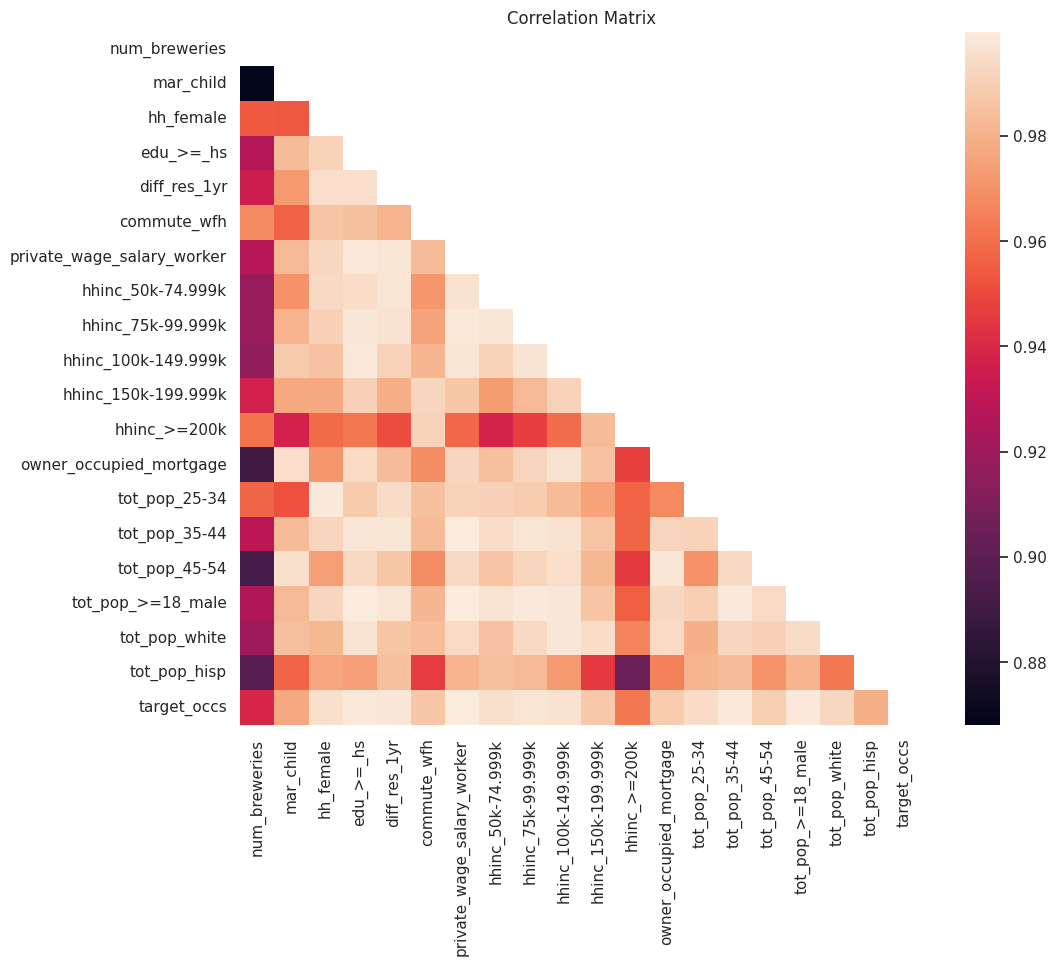

In [39]:
def plot_correlation_matrix(df):
    """Function to plot a correlation matrix of variance which helps idetnfiy covariance amongst variables.
    params: gdf{Pandas|GeoPandas DF|GDF} - the dataframe from which correlation is evaluated
    returns: Seaborn heatmap of correlation
    """
    sns.set_theme(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    sns.heatmap(corr, mask=mask)
    
plot_correlation_matrix(sel_df_demo)
plt.title('Correlation Matrix');

### Correlation Observations:
* We show strong strong correlations among all variables, however, clustering is a viable analytical option as agglomerative hierarchical and DBSCAN clustering are less sensitive to interrelated/correlated data structure, followed by KMeans.
    - We anticipate for example that education-level attained and household income are correlated and wish to know which cities have similar populations amenable to craft brewing.
    - all variables will be, to some extent, a function of the total overall population
* We do not need to remove highly correlated variables from clustering for collinearity concerns. Clustering does not rely on linear assumptions and so collinearity will not cause issues.
### Considerations for Highly Correlated Variables:
* Redundancy and Information Overlap: High correlation between variables indicates redundancy or strong information overlap. In clustering, this redundancy may lead to clusters being more influenced by a subset of variables, potentially affecting the separation and distinction of clusters.
* Sensitivity of Clustering Algorithms: Different clustering algorithms have varying degrees of sensitivity to the correlation among variables. Some algorithms may be more robust and less affected by high correlation, while others may struggle to differentiate clusters.
* Impact on Cluster Structure: The high correlation among variables can affect the interpretation of cluster structure. Clusters may be formed based on a subset of variables, and the overall structure may be less representative of the entire feature space.
* Cluster Stability: High correlation can make clusters less stable, meaning small changes in the input data may lead to significant changes in the cluster assignments.
### Highly Correlated Variable Mitigation Strategies:
* Dimensionality reduction: the fewer variables present in a subset, the fewer interactions possible
* Domain knowledge: we have reduced groupings of variables based off of our understanding of key craft beer drinker demographics--see `Craft Beer Drinker Demographics` section above, although there will still be some correlation
* Post-modeling: we can examine the stability and coherence of the clusters through visualization and silhouette score. Once clusters have been obtained we can also post-process these for further refinement.